In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
from PIL import Image as ImagePIL
import itertools
import time
from astropy.io import fits
import cv2
import matplotlib.patches as patches
import math

%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '../../data/ngc628/blanc_fits/'
os.chdir(data_path)

In [31]:
from matplotlib import colors
from matplotlib import pyplot as plt

# http://www-astro.physics.ox.ac.uk/~mxc/software/

def register_sauron_colormap():
    """
    Regitsr the 'sauron' and 'sauron_r' colormaps in Matplotlib

    """
    cdict = {'red':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.4,    0.4),
                 (0.414,   0.5,    0.5),
                 (0.463,   0.3,    0.3),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.9,    0.9)],
        'green':[(0.000,   0.01,   0.01),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)],
         'blue':[(0.000,   0.01,   0.01),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.0,    0.0),
                 (0.590,   0.0,    0.0),
                 (0.668,   0.0,    0.0),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.9,    0.9)]
         }

    rdict = {'red':[(0.000,   0.9,    0.9),
                 (0.170,   1.0,    1.0),
                 (0.336,   1.0,    1.0),
                 (0.414,   1.0,    1.0),
                 (0.463,   0.7,    0.7),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.3,    0.3),
                 (0.590,   0.5,    0.5),
                 (0.668,   0.4,    0.4),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
        'green':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.85,   0.85),
                 (0.414,   1.0,    1.0),
                 (0.463,   1.0,    1.0),
                 (0.502,   0.9,    0.9),
                 (0.541,   1.0,    1.0),
                 (0.590,   1.0,    1.0),
                 (0.668,   0.85,   0.85),
                 (0.834,   0.0,    0.0),
                 (1.000,   0.01,   0.01)],
         'blue':[(0.000,   0.9,    0.9),
                 (0.170,   0.0,    0.0),
                 (0.336,   0.0,    0.0),
                 (0.414,   0.0,    0.0),
                 (0.463,   0.0,    0.0),
                 (0.502,   0.0,    0.0),
                 (0.541,   0.7,    0.7),
                 (0.590,   1.0,    1.0),
                 (0.668,   1.0,    1.0),
                 (0.834,   1.0,    1.0),
                 (1.000,   0.01,   0.01)]
         }

    sauron = colors.LinearSegmentedColormap('sauron', cdict)
    sauron_r = colors.LinearSegmentedColormap('sauron_r', rdict)
    plt.register_cmap(cmap=sauron)
    plt.register_cmap(cmap=sauron_r)
    
    
register_sauron_colormap()

In [3]:
hdulist = fits.open('NGC0628_map_sigstar.fits')
hdulist[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11         
BITPIX  =                  -64 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  160 /                                                
NAXIS2  =                   60 /                                                
EXTEND  =                    T /Extensions may be present                       
HISTORY ------ Data cube made with IDL program mkvpcubereg.pro -------          
OBJECT  = '3491.000'           /                                                
CTYPE1  = 'RA---TAN'           /Coordinate Type                                 
CTYPE2  = 'DEC--TAN'           /Coordinate Type                                 
CUNIT1  = 'deg     '           /                                                
CUNIT2  = 'deg     '           /                                                
CRPIX1  =              1.000

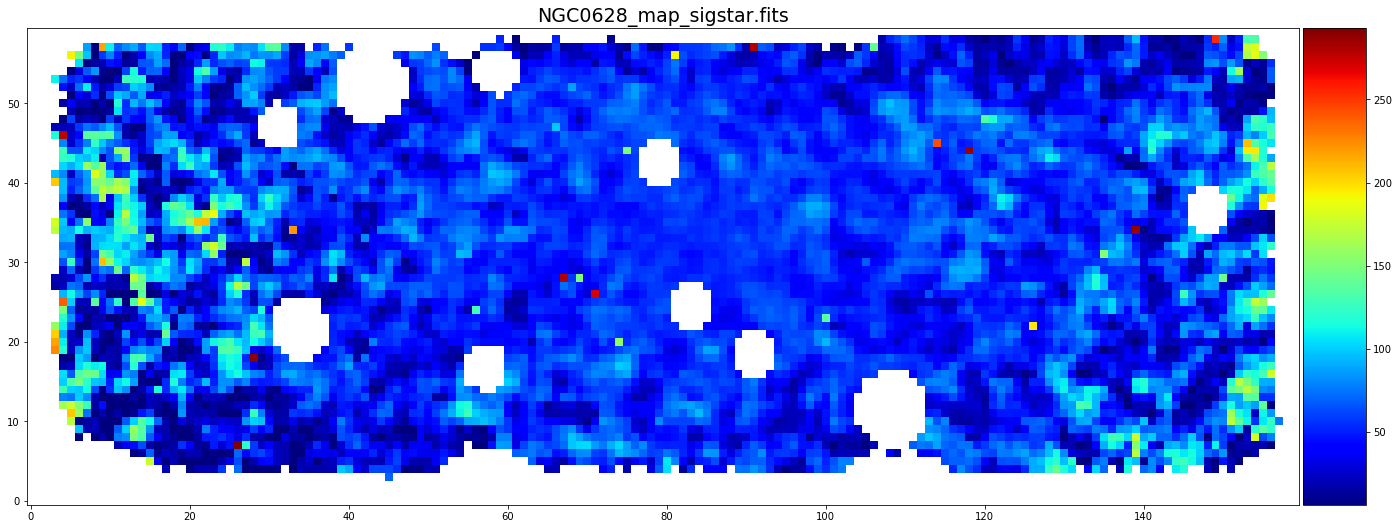

In [9]:
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=[24,16])
ax = plt.gca()
fname = 'NGC0628_map_sigstar.fits'
data = fits.getdata(fname)
im = plt.imshow(np.squeeze(data), origin='lower', cmap='jet')

plt.title(fname, fontsize=19)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

In [10]:
np.squeeze(data).shape

(60L, 160L)

In [11]:
data = np.squeeze(data)
data = np.nan_to_num(data)

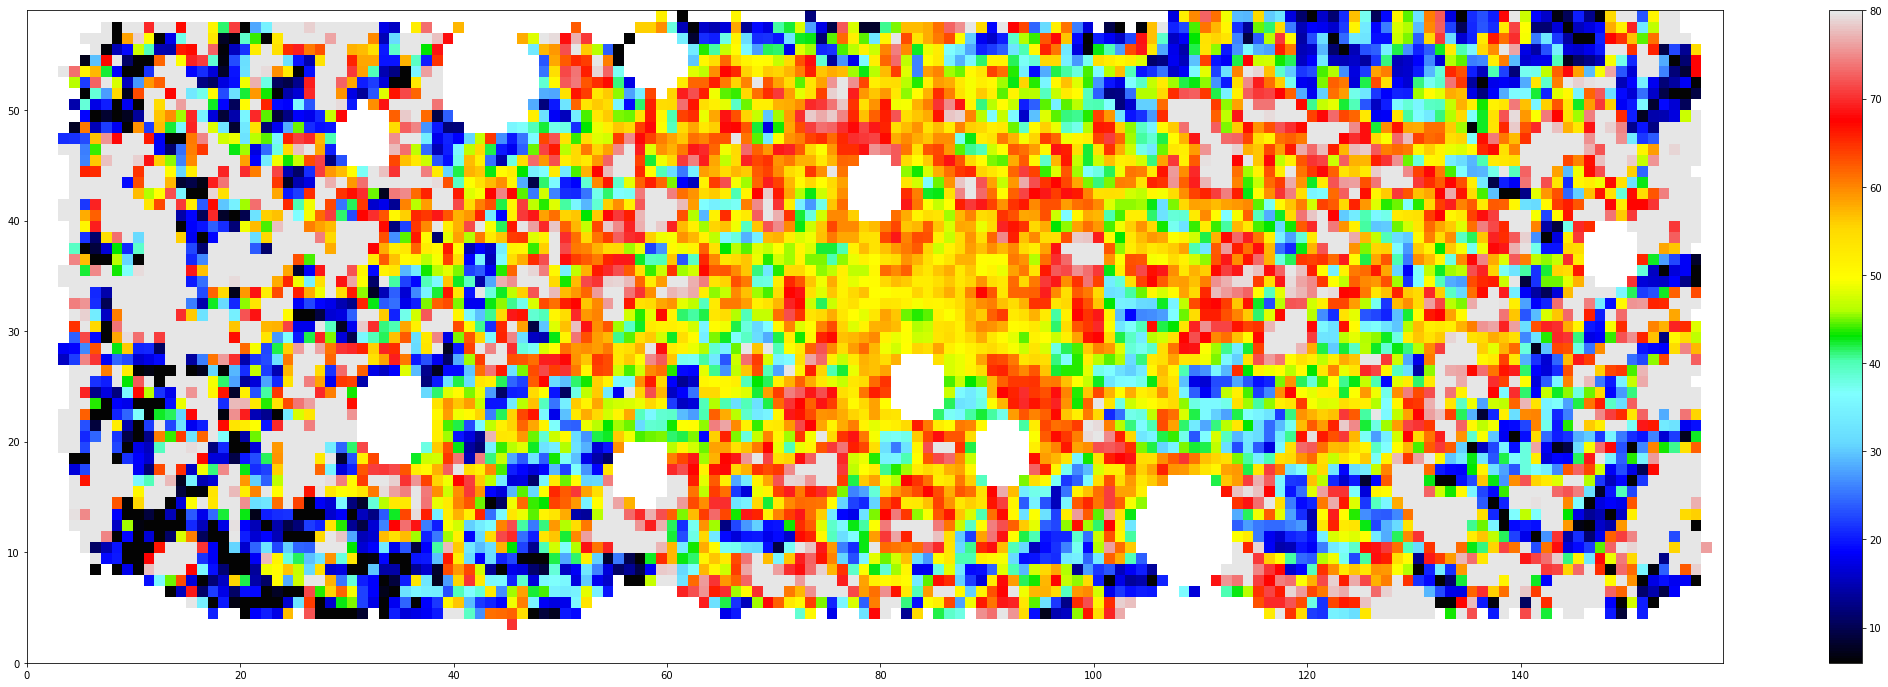

In [33]:
X,Y = np.meshgrid(np.arange(0.,len(data[0]),1), np.arange(0.,len(data),1))
Z = data

# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
fig = plt.figure(figsize=[38, 12])
quadmesh = plt.pcolormesh(X, Y, Z, cmap='sauron')
quadmesh.set_clim(vmin=6., vmax=80.)

# CS = plt.contour(X, Y, Z, levels=[5000, 10000, 20000])
# plt.clabel(CS, inline=1, fontsize=10)

plt.colorbar()
# quadmesh.cmap.set_under('white')

map_EBmVbalmer.fits


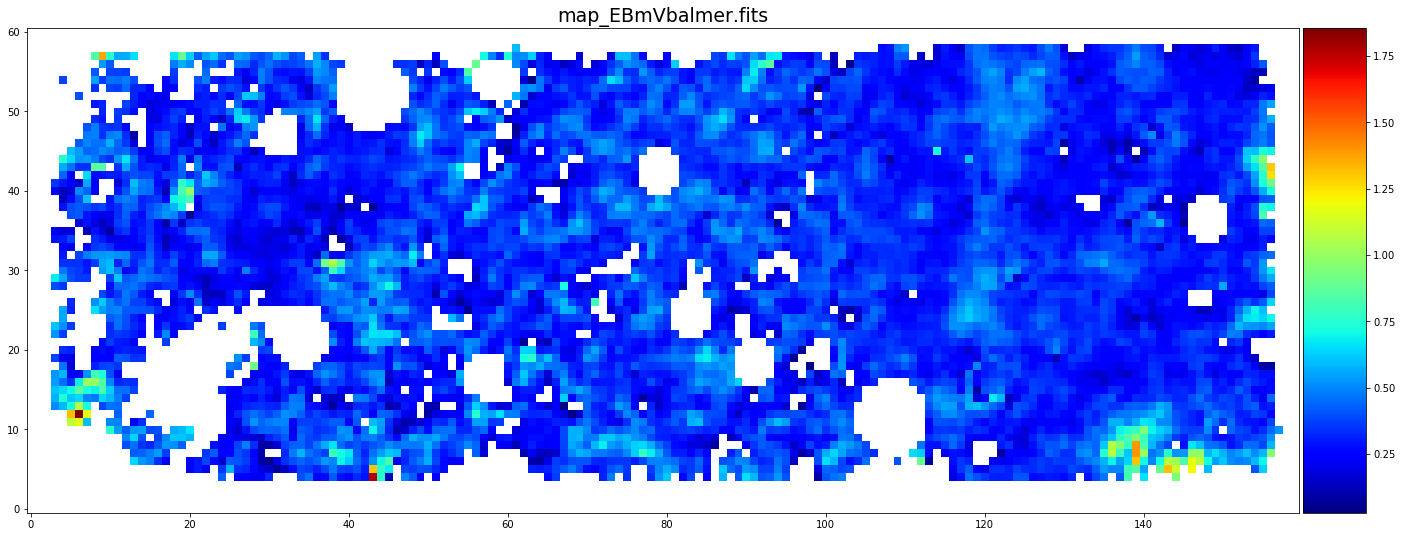

map_EBmVbalmer_err.fits


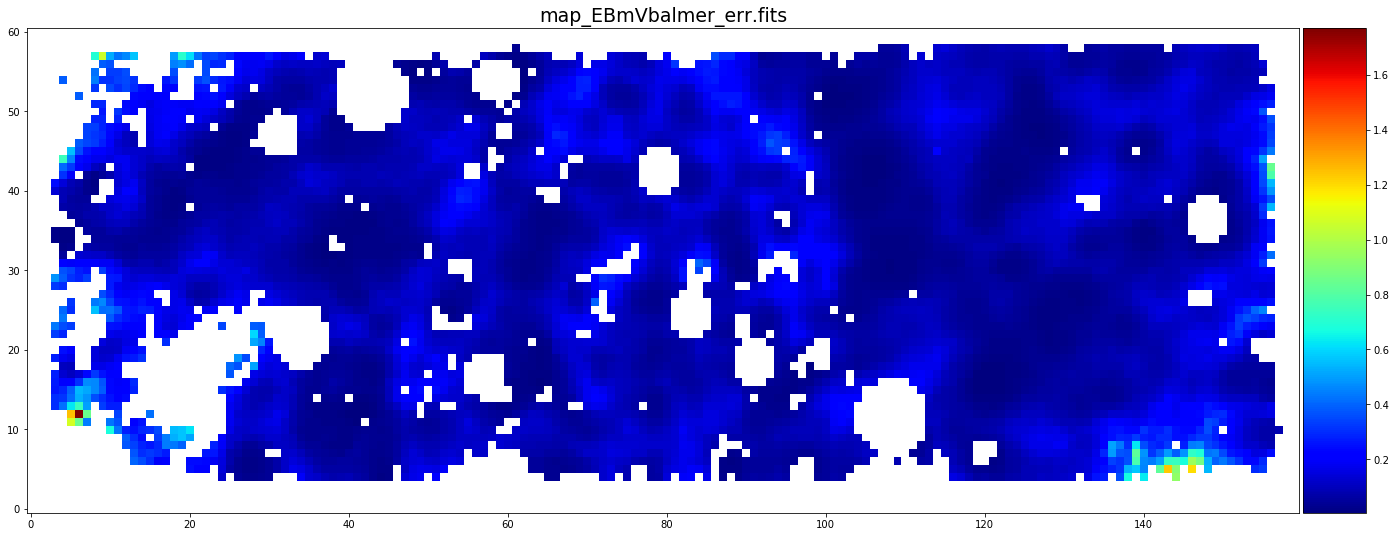

map_ha.fits


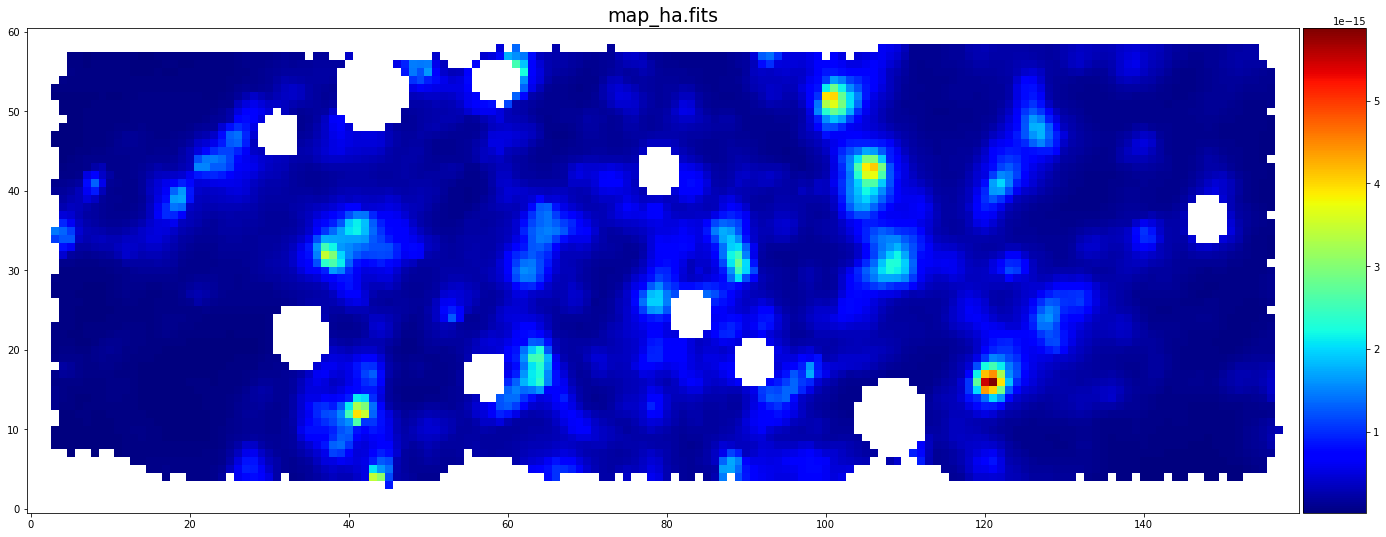

map_ha_corr.fits


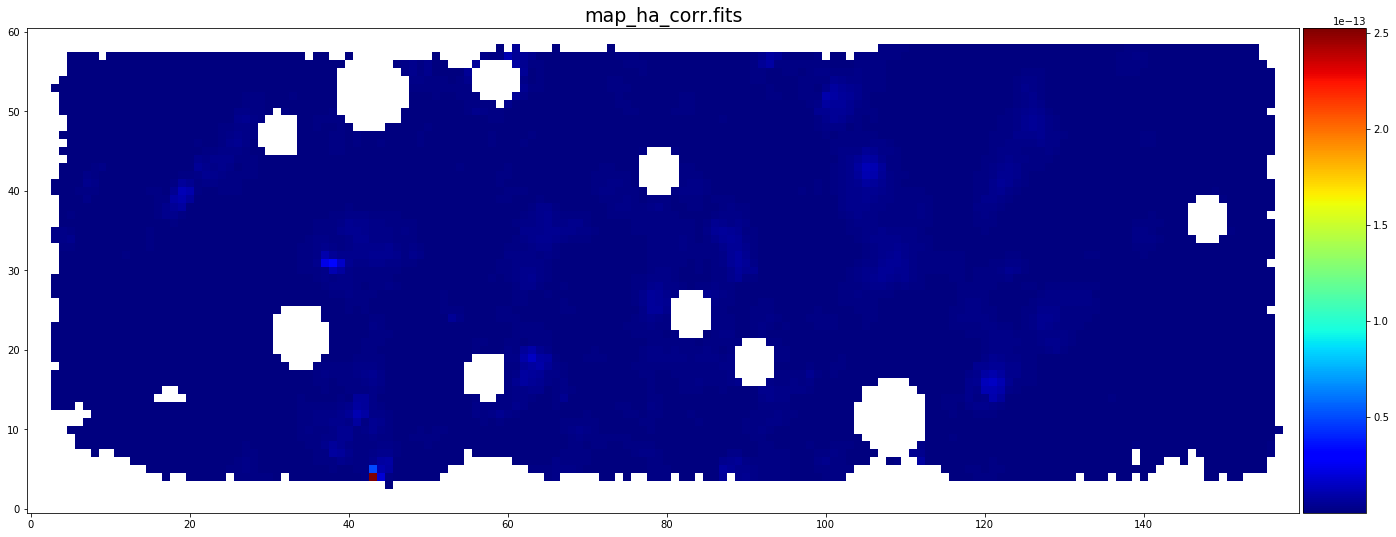

map_ha_corr_err.fits


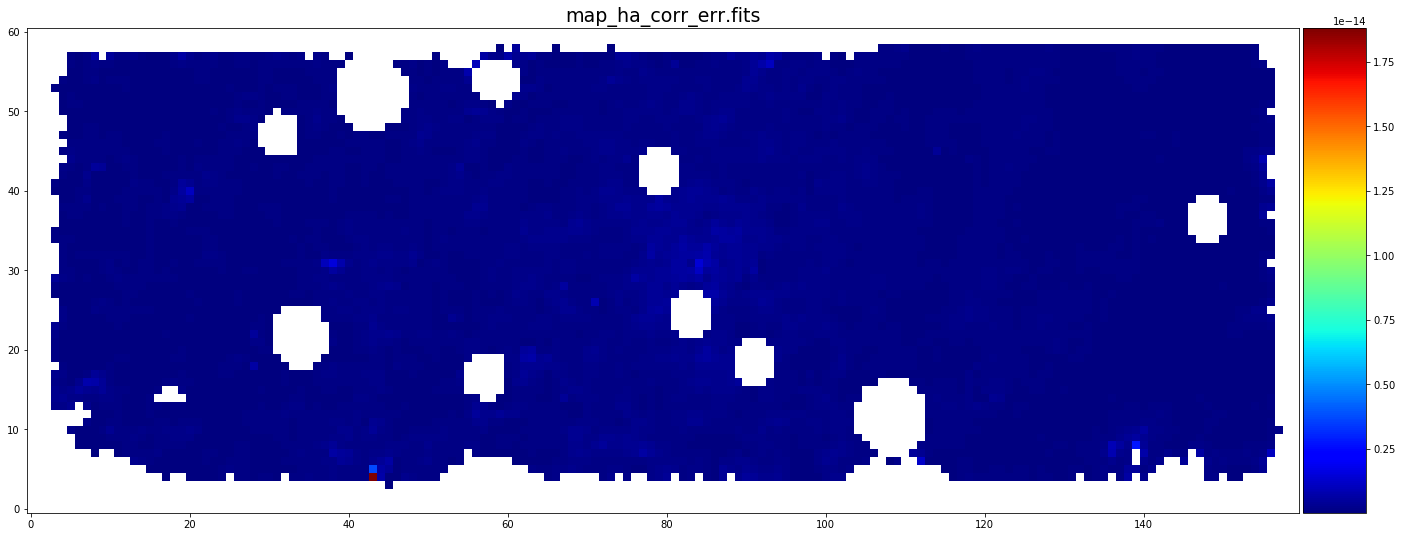

map_ha_err.fits


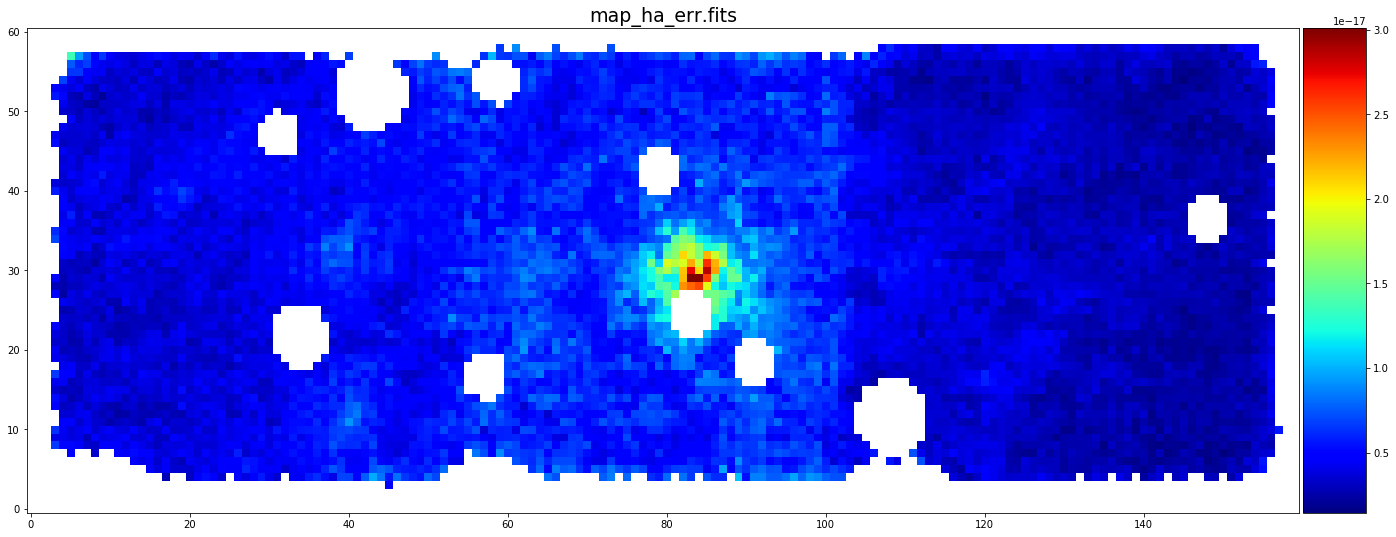

map_ha_hb.fits


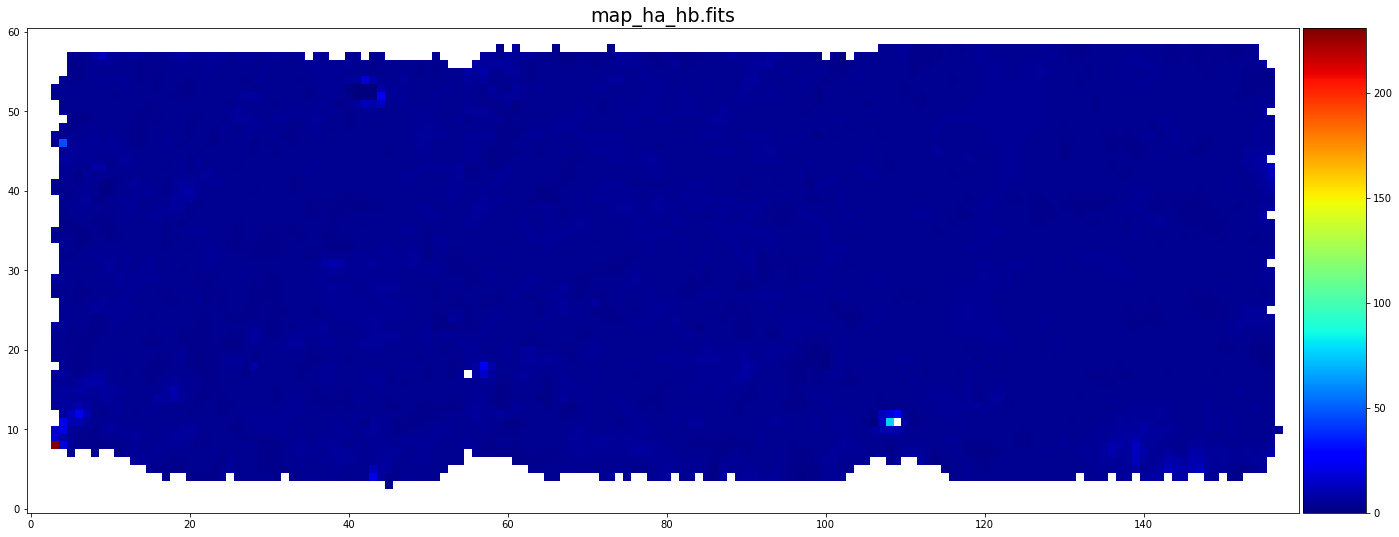

map_ha_hb_err.fits


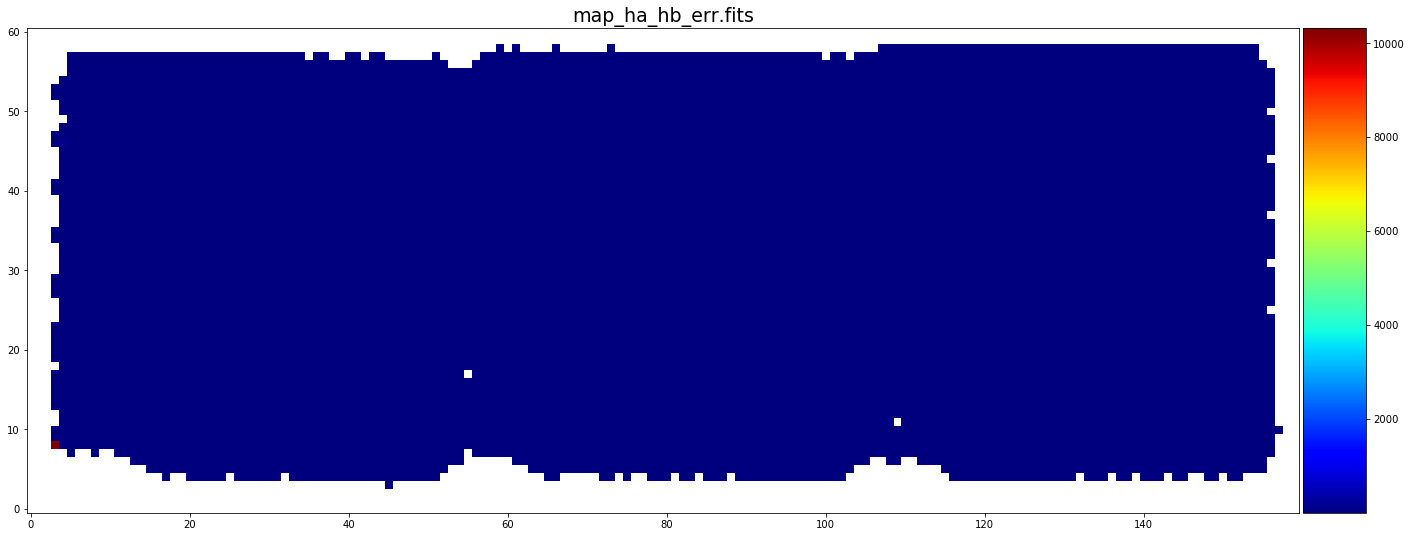

map_hb.fits


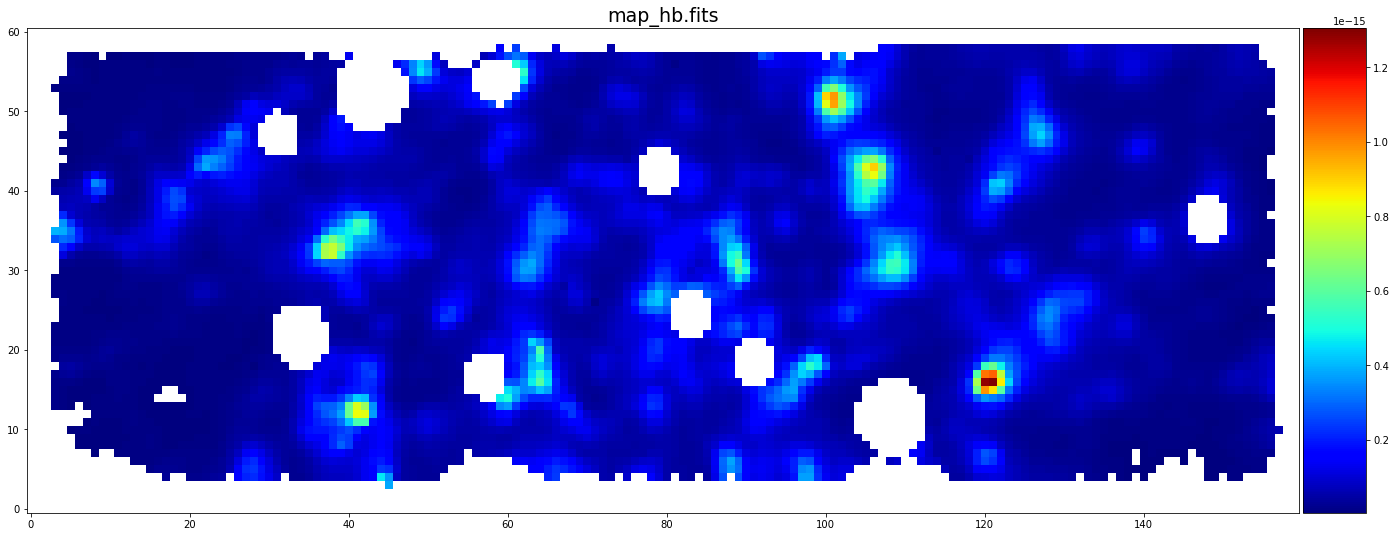

map_hb_corr.fits


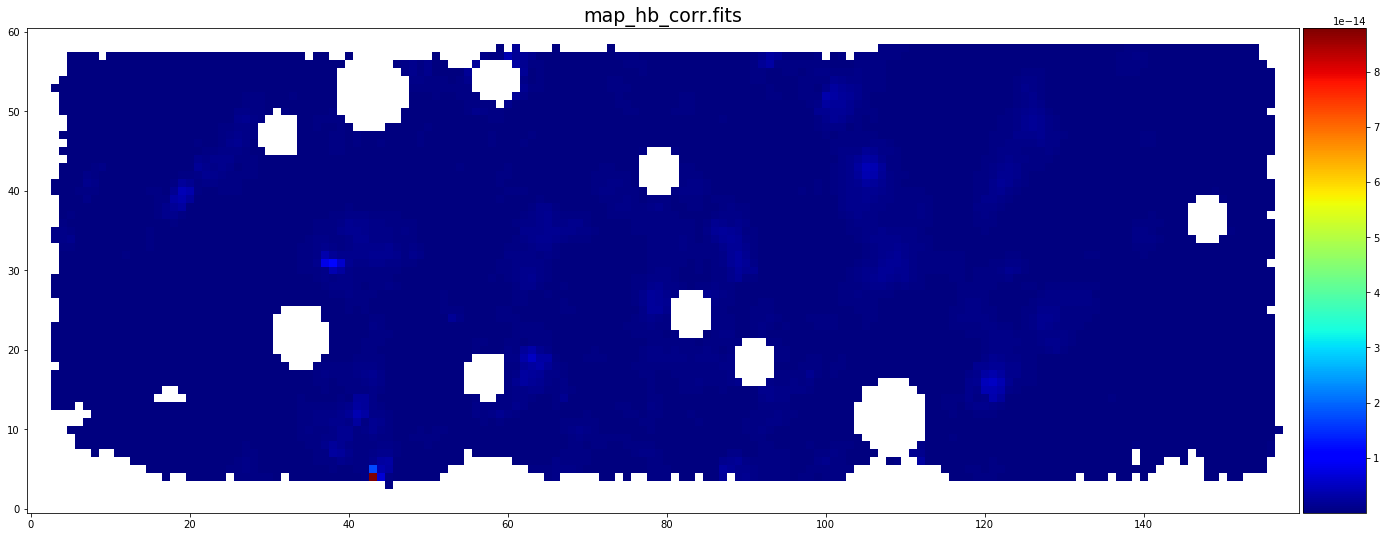

map_hb_corr_err.fits


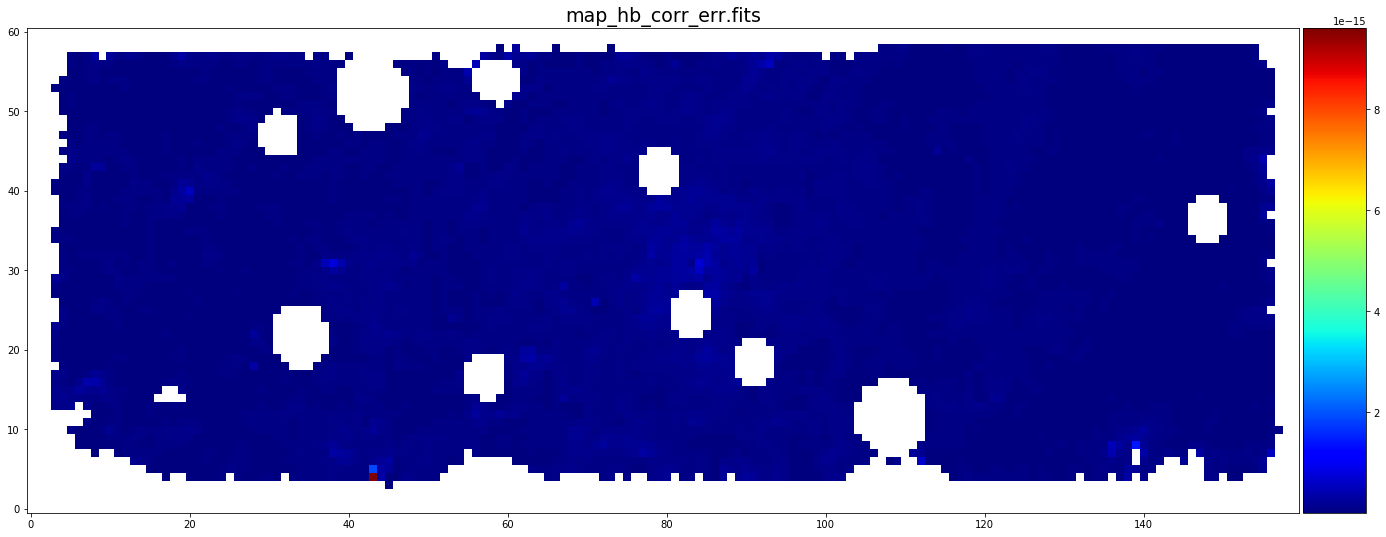

map_hb_err.fits


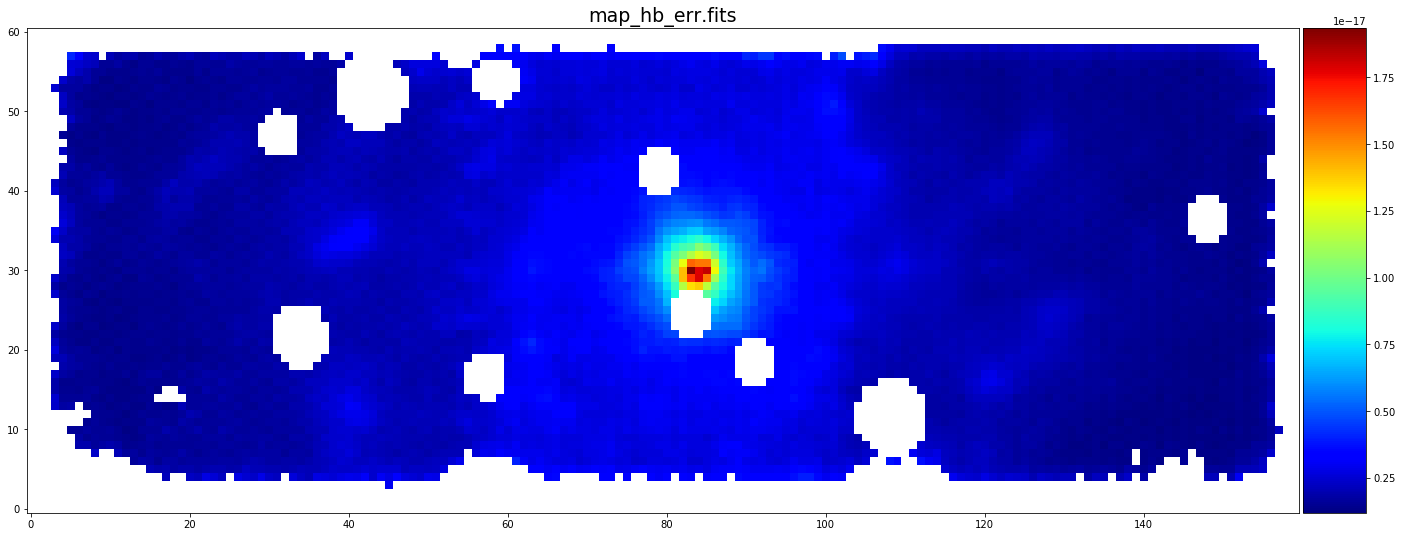

map_izi_logq.fits


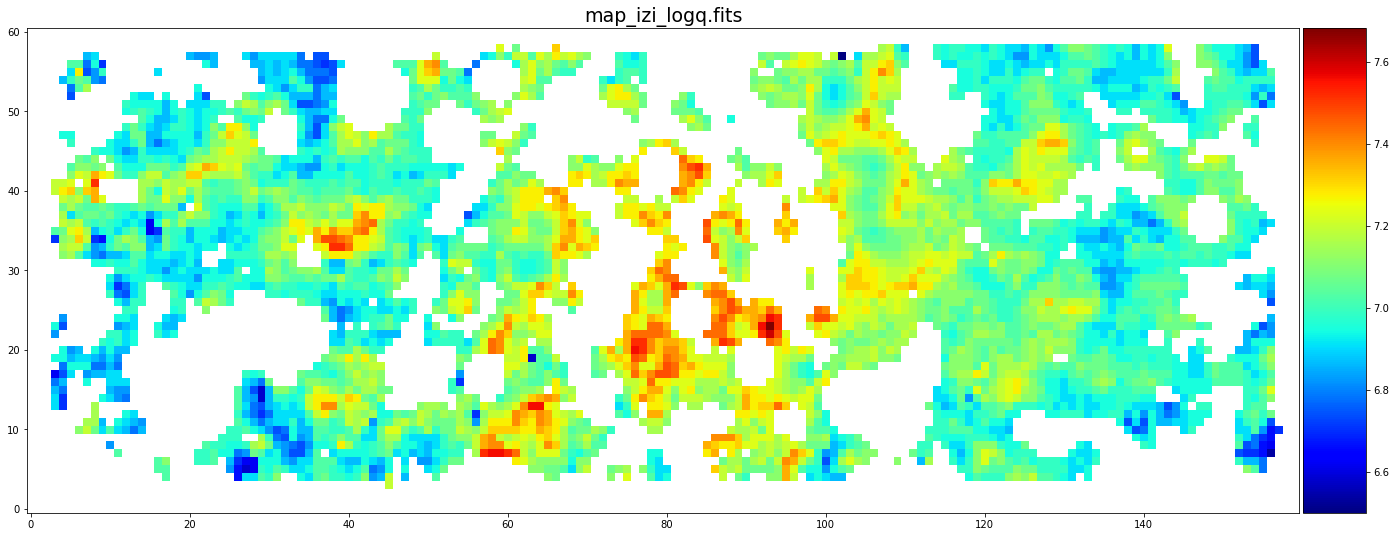

map_izi_logz.fits


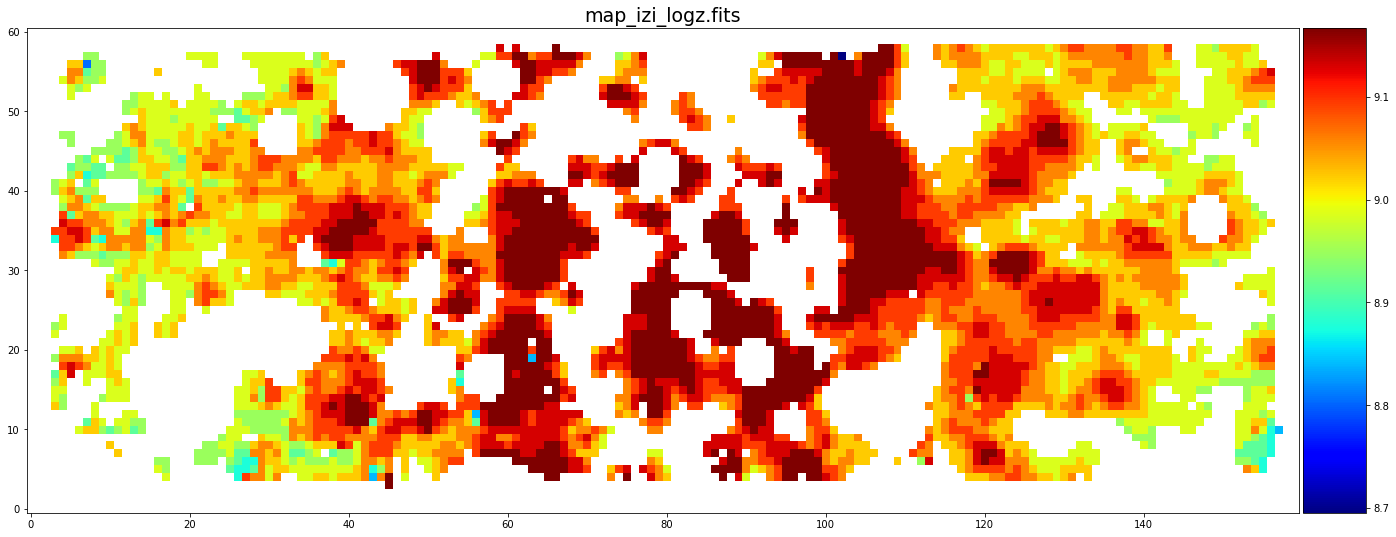

map_mpolycoef.fits


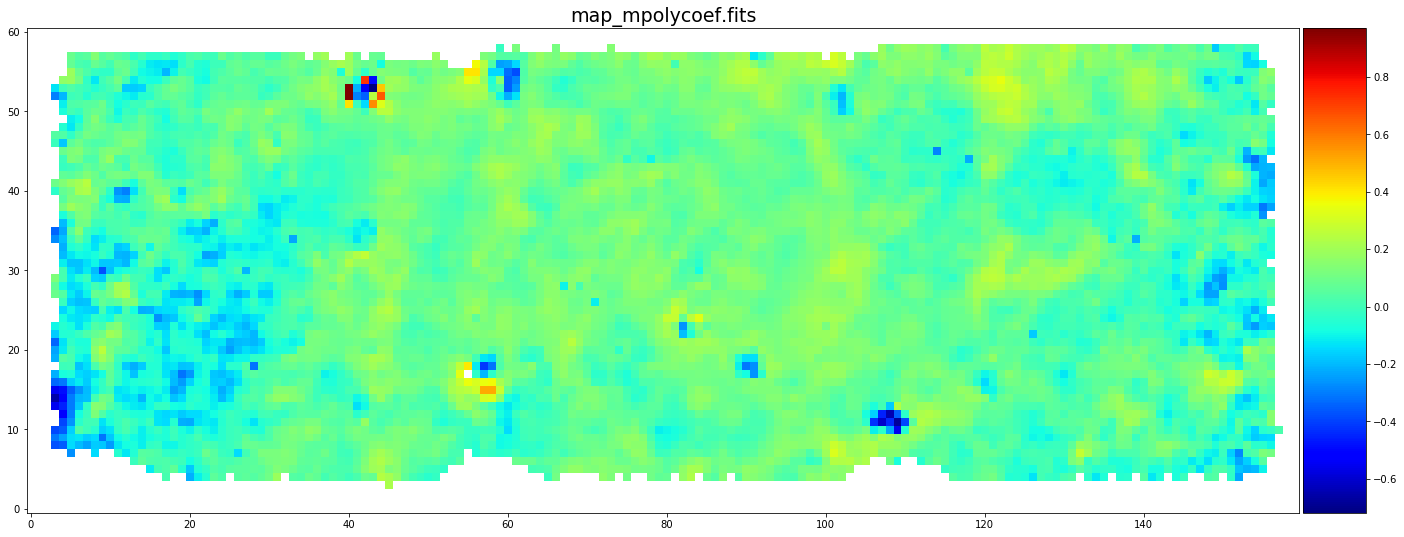

map_nii6548_corr.fits


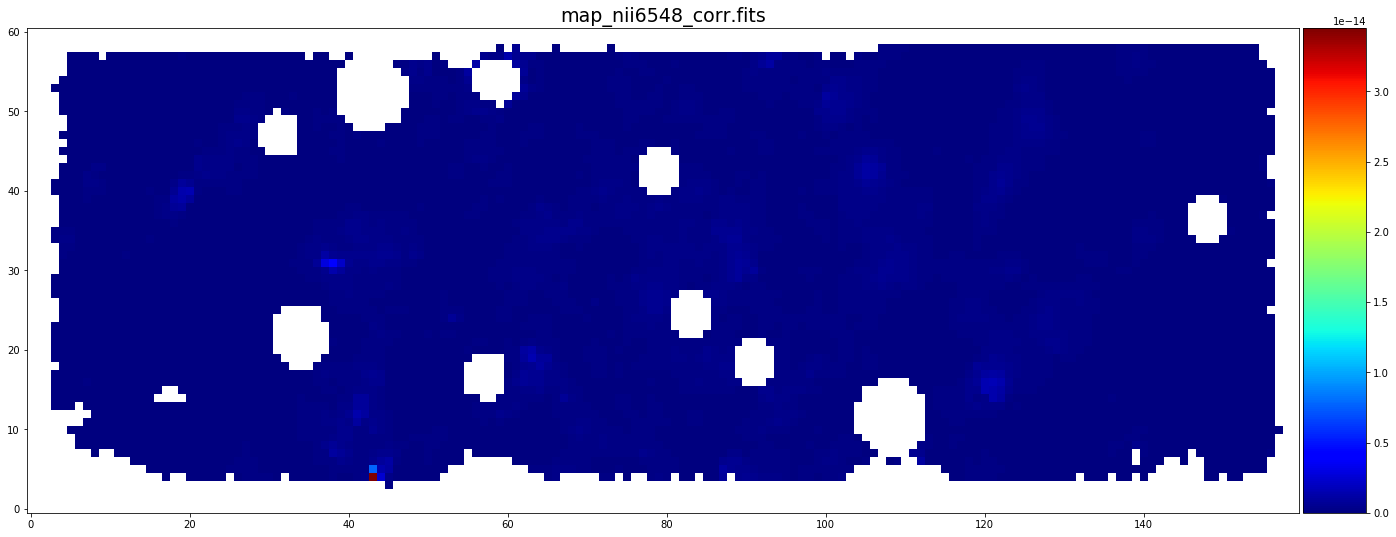

map_nii6548_corr_err.fits


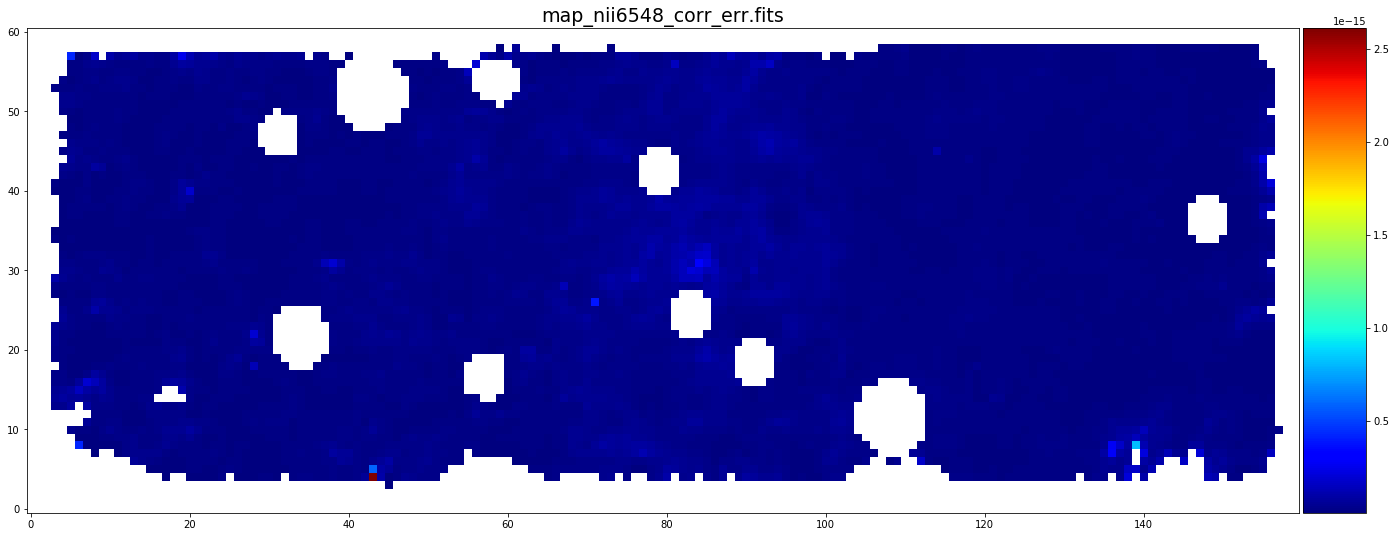

map_nii6583_corr.fits


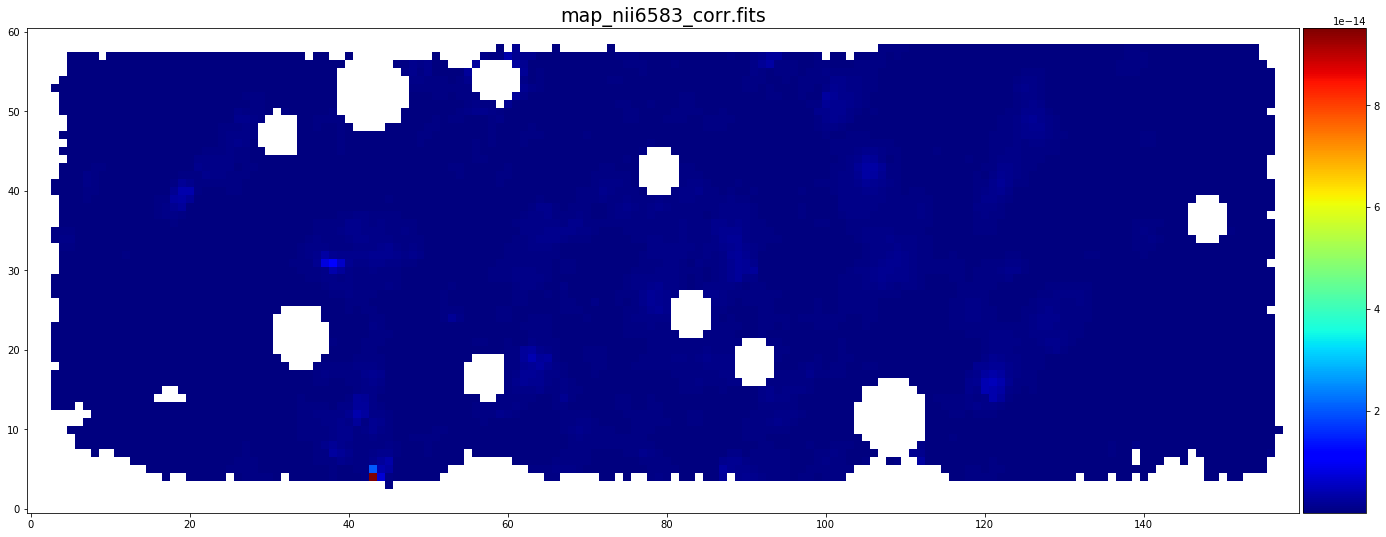

map_nii6583_corr_err.fits


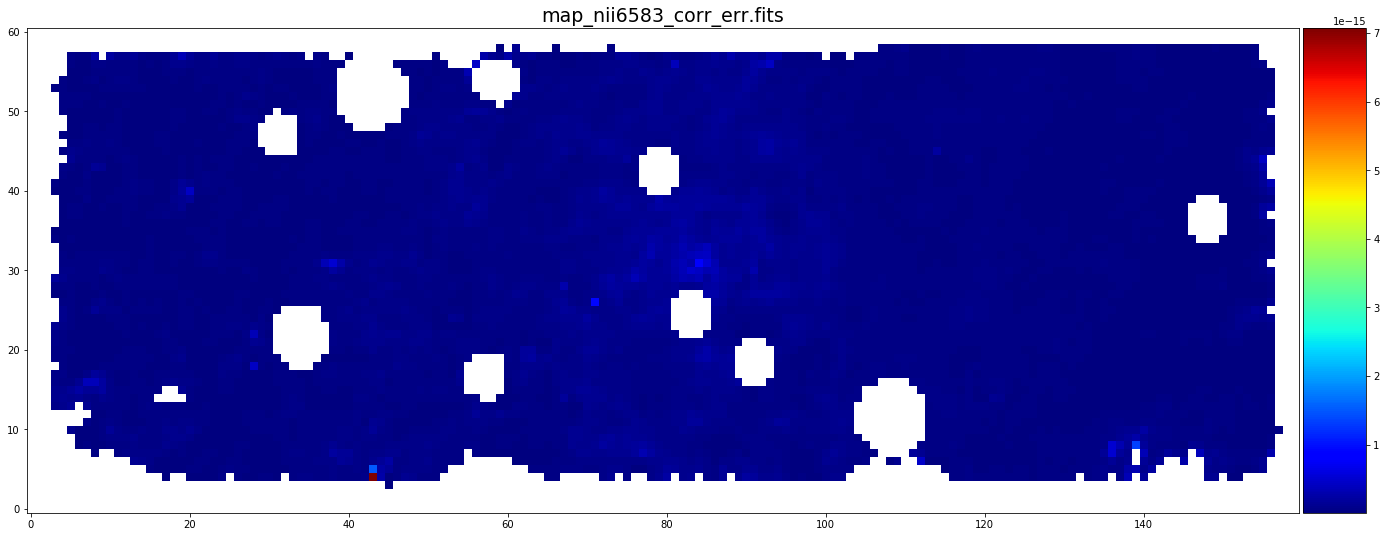

map_oii3727_corr.fits


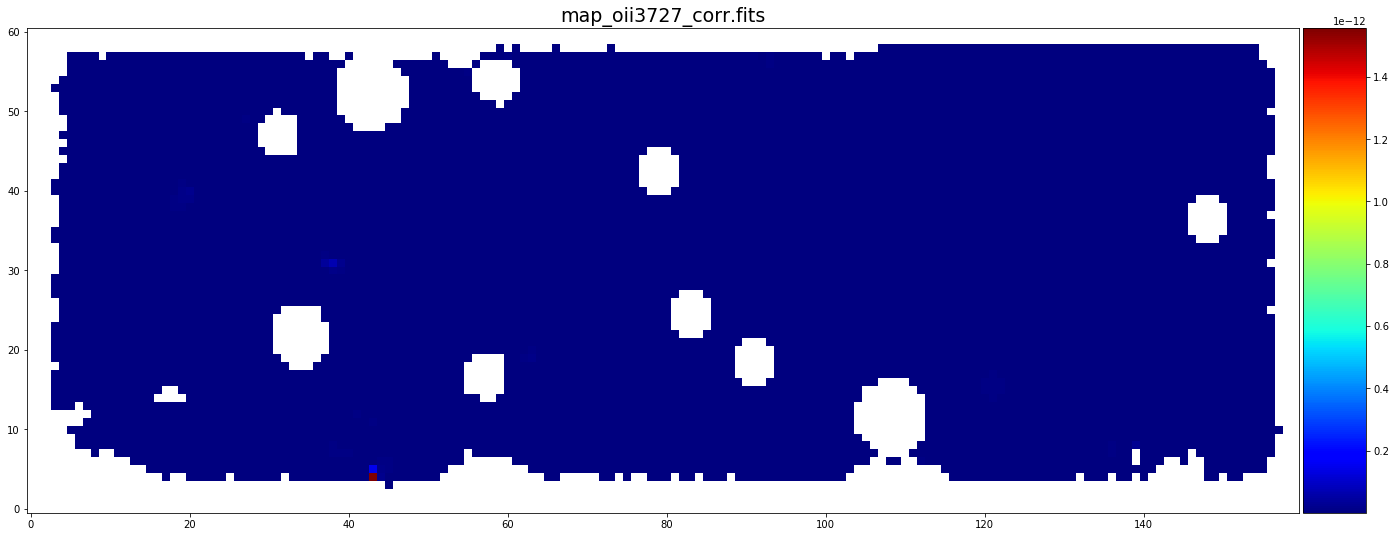

map_oii3727_corr_err.fits


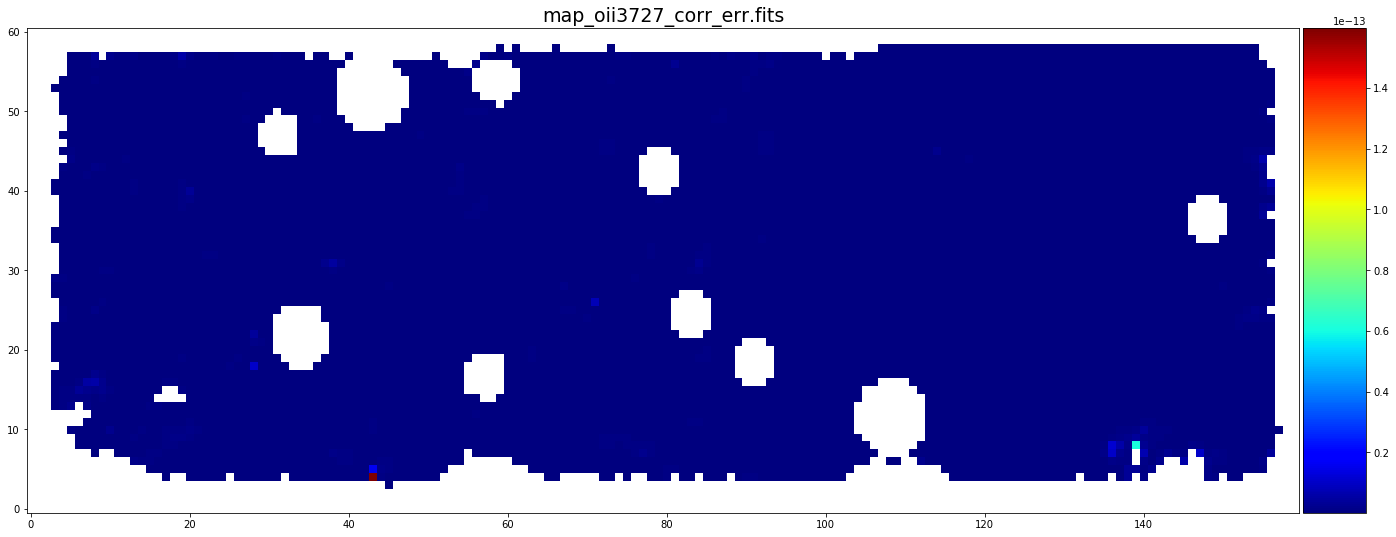

map_oiii5007_corr.fits


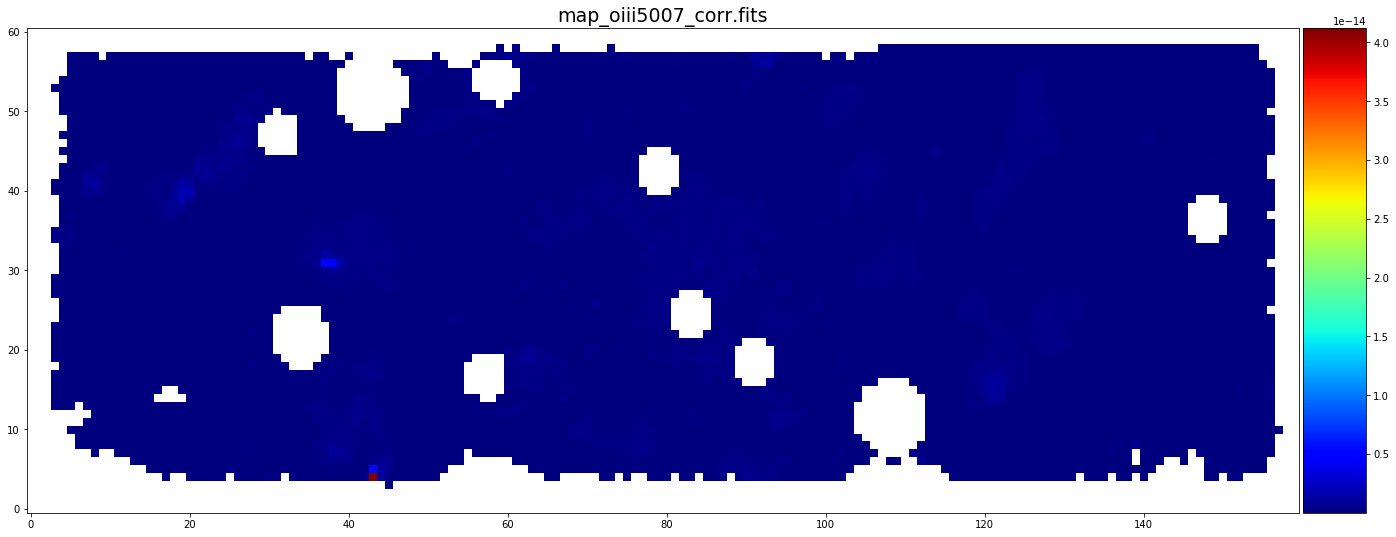

map_oiii5007_corr_err.fits


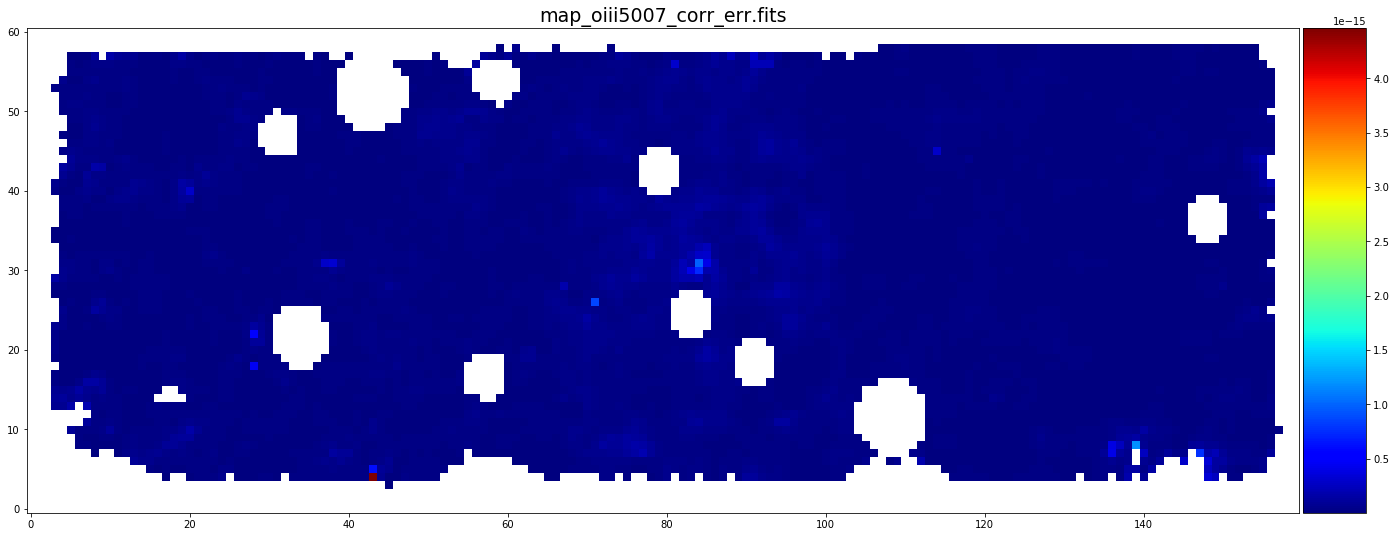

map_sii6717_corr.fits


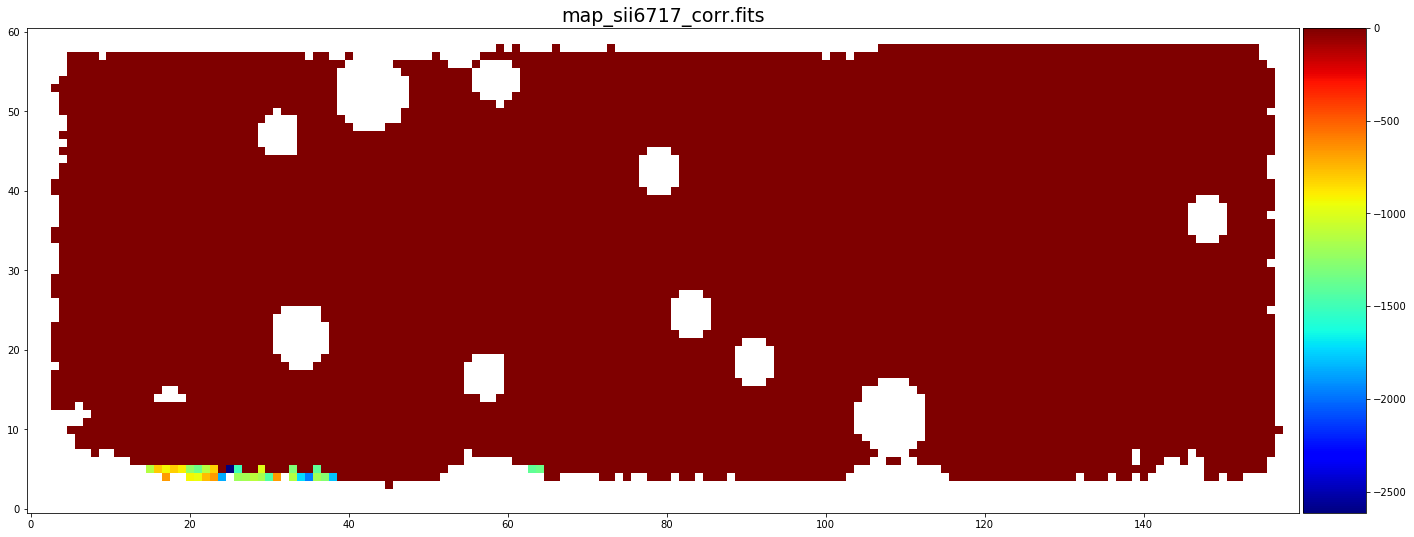

map_sii6717_corr_err.fits


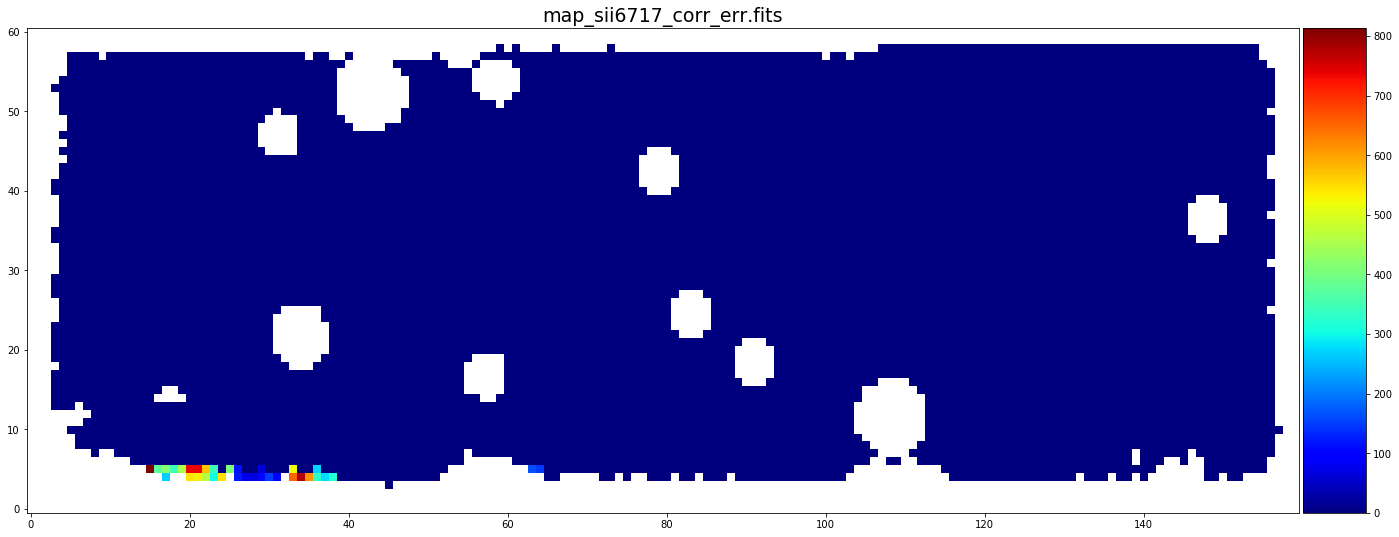

map_sii6731_corr.fits


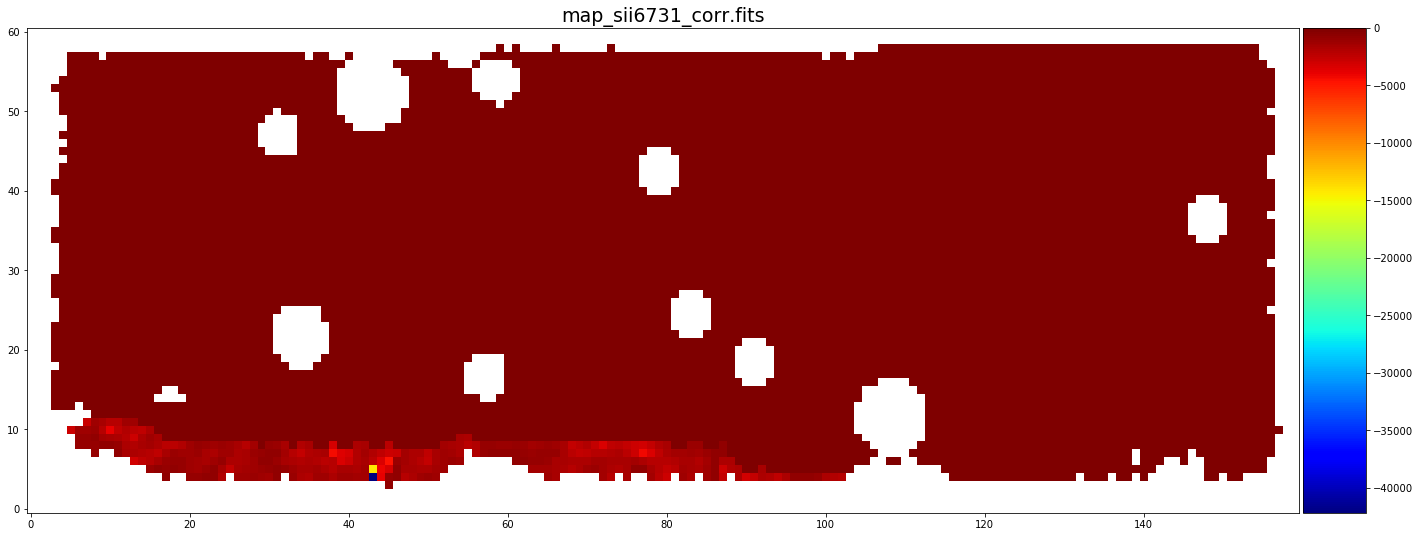

map_sii6731_corr_err.fits


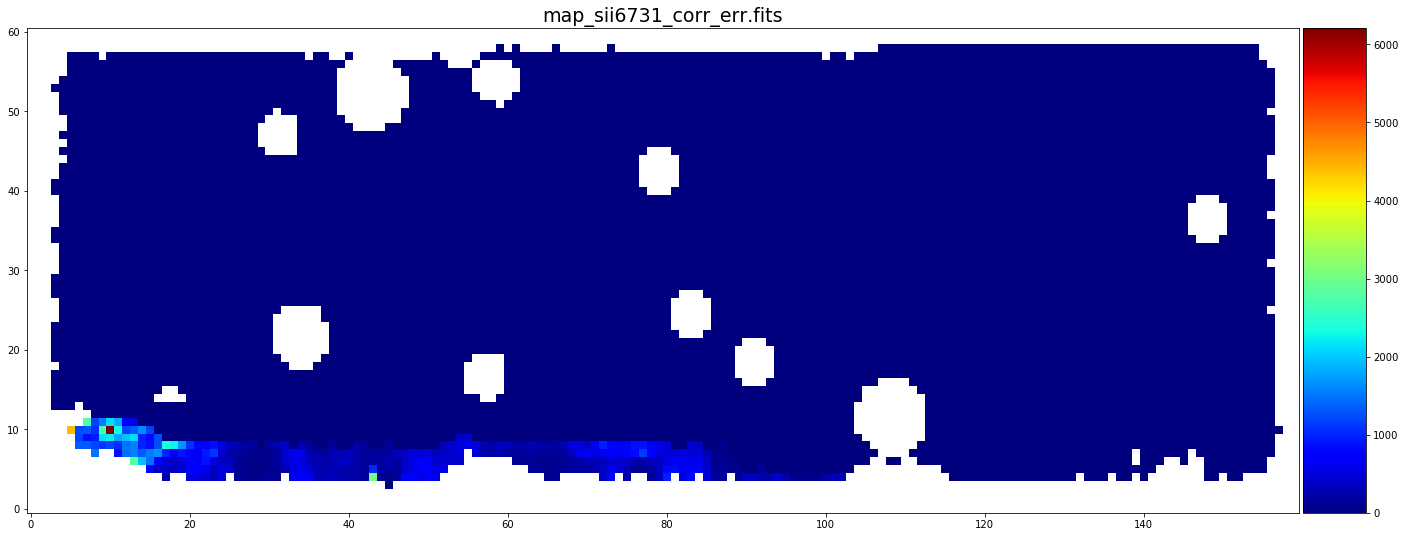

NGC0628_cube_log.fits.crdownload
NGC0628_gas_ls.fits.crdownload
NGC0628_log.fits.crdownload
NGC0628_log_SPIRE_250_convcube.fits.crdownload
NGC0628_log_SPIRE_250_convrss.fits.crdownload
NGC0628_log_SPIRE_350_convcube.fits.crdownload
NGC0628_map_EBmVbalmer.fits


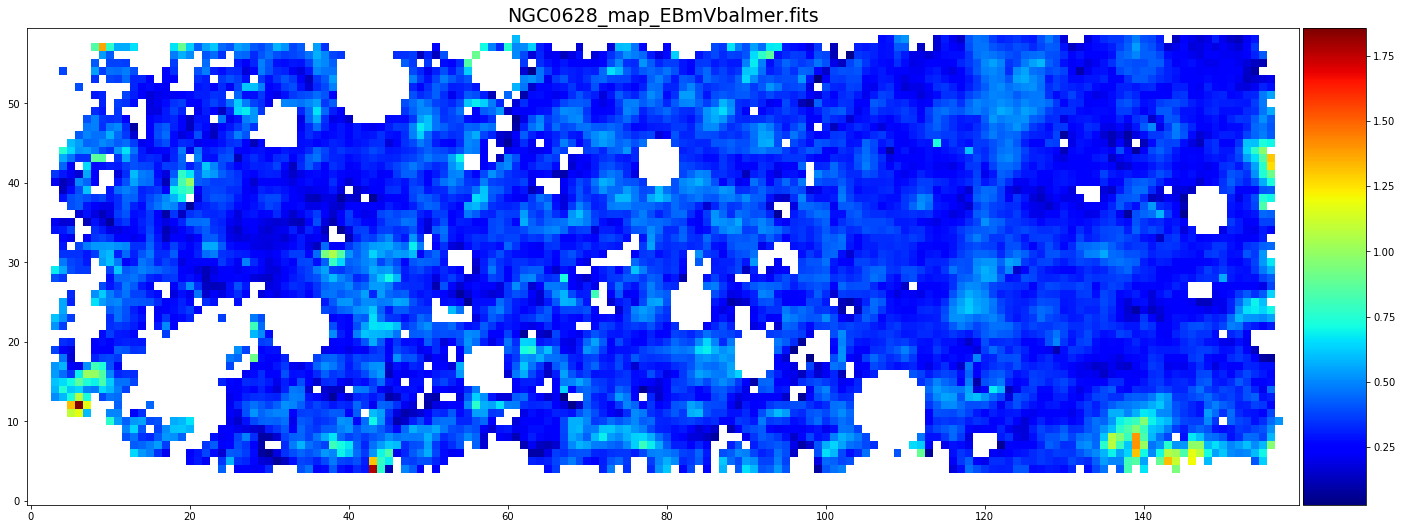

NGC0628_map_EBmVbalmer_err.fits


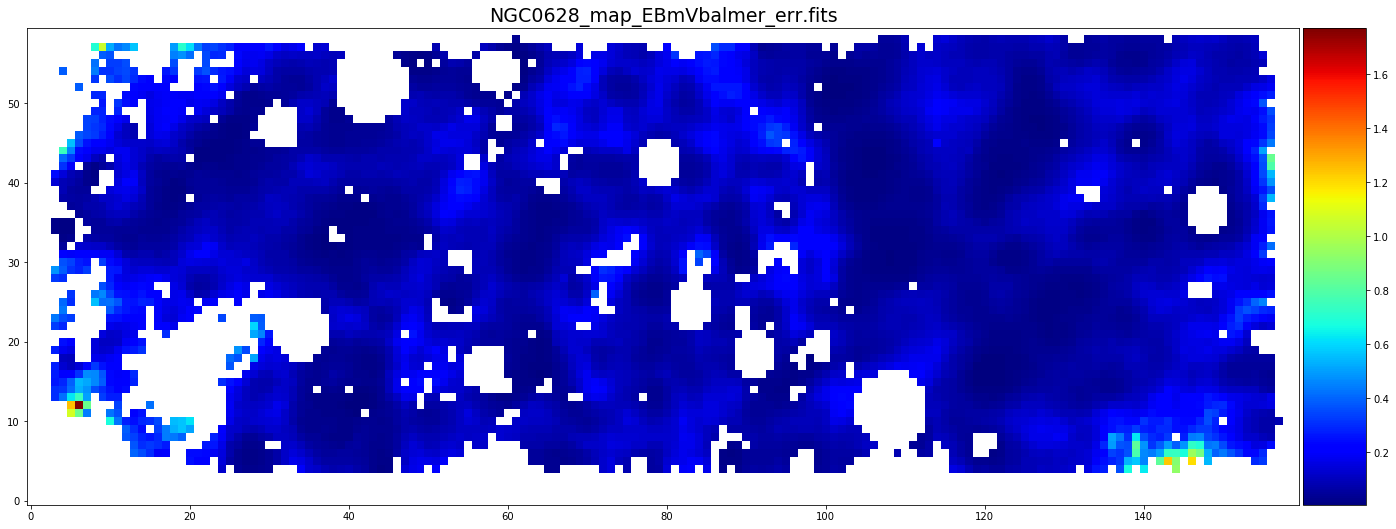

NGC0628_map_ha.fits


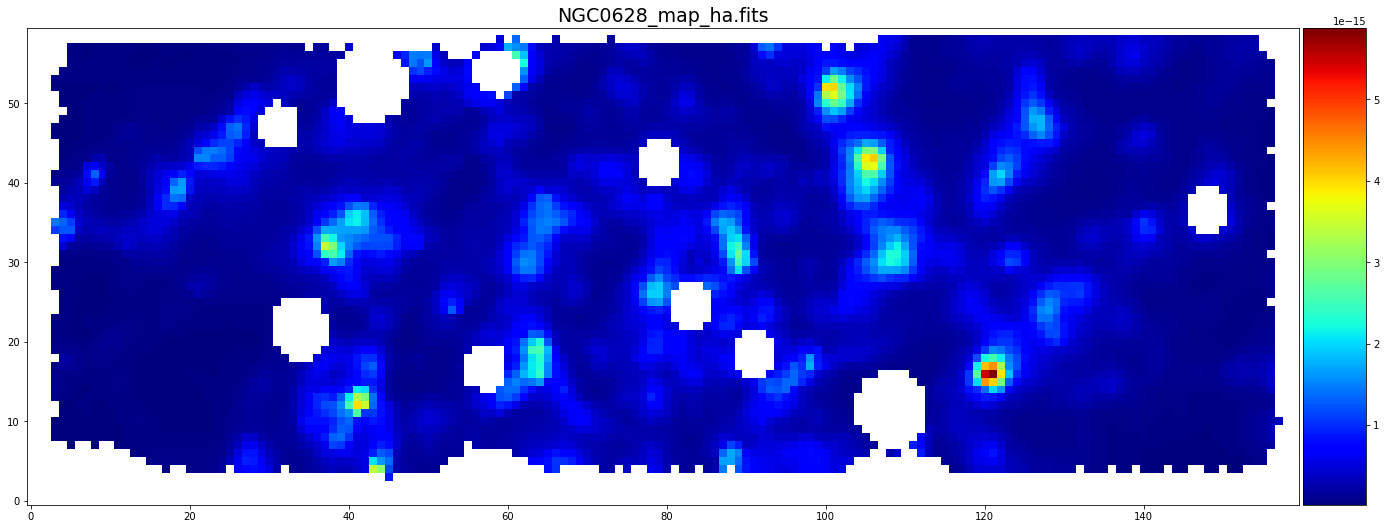

NGC0628_map_ha_corr.fits


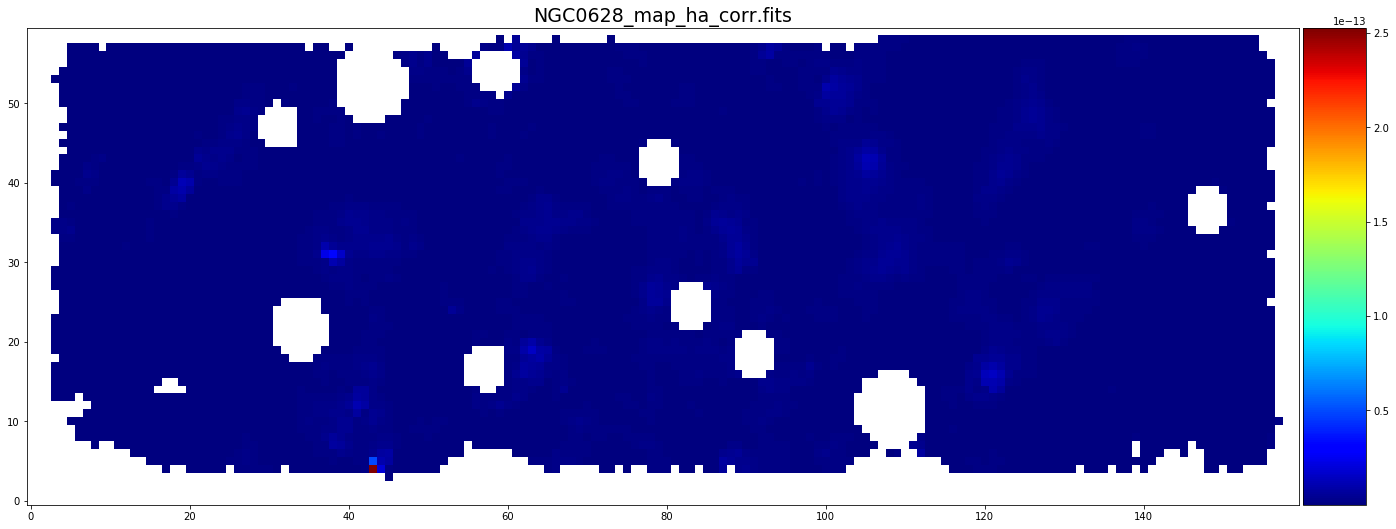

NGC0628_map_ha_corr_err.fits


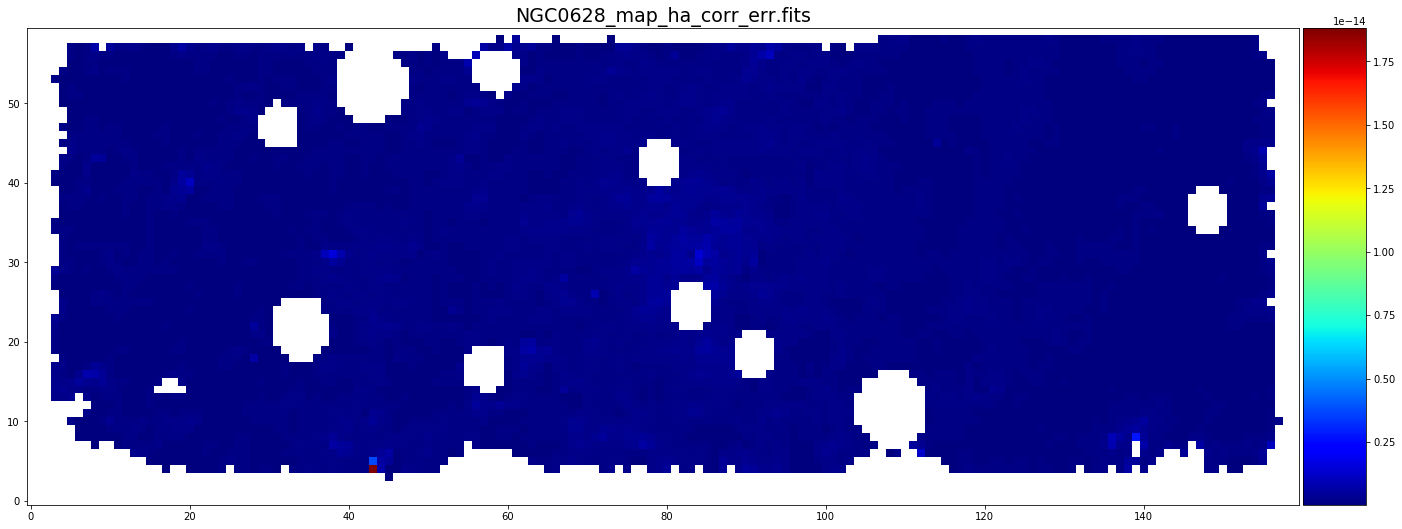

NGC0628_map_ha_err.fits


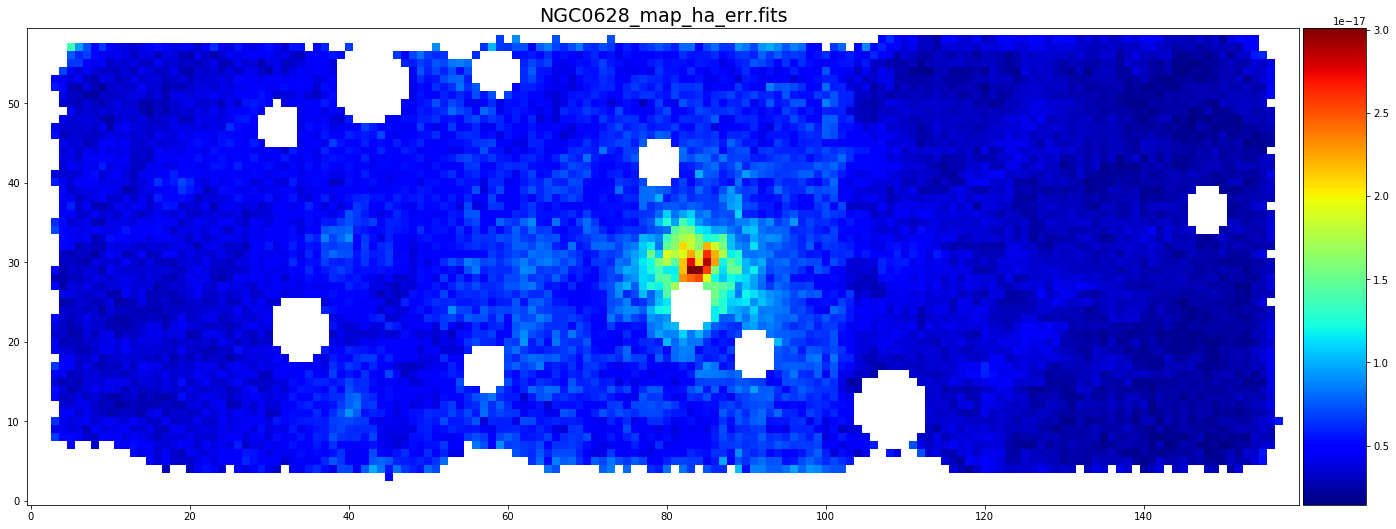

NGC0628_map_ha_hb.fits


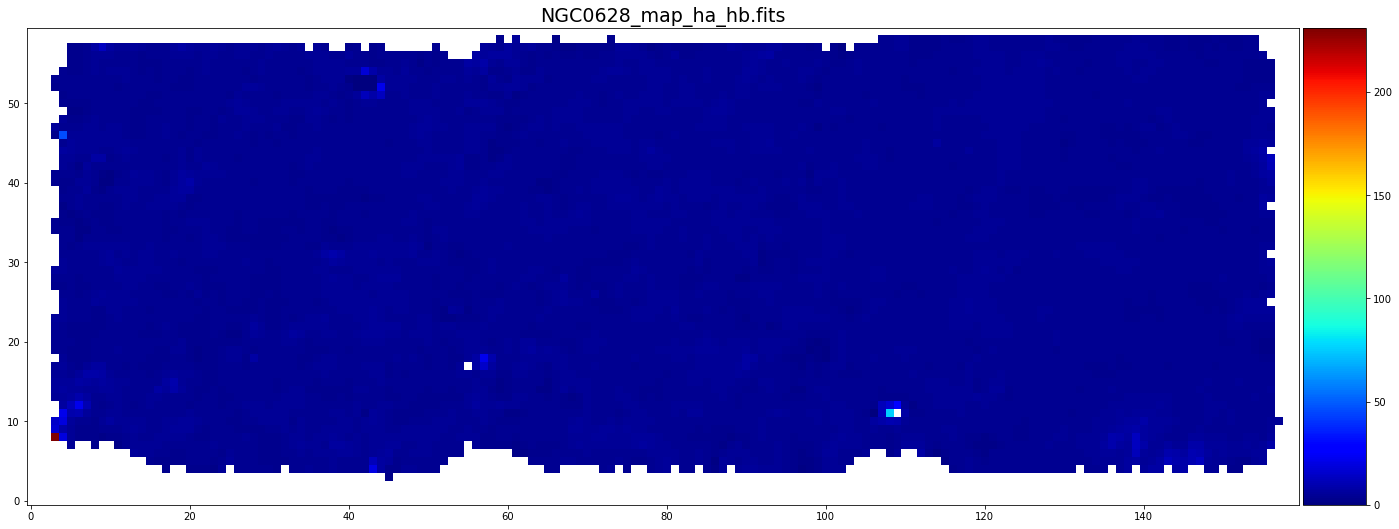

NGC0628_map_ha_hb_err.fits


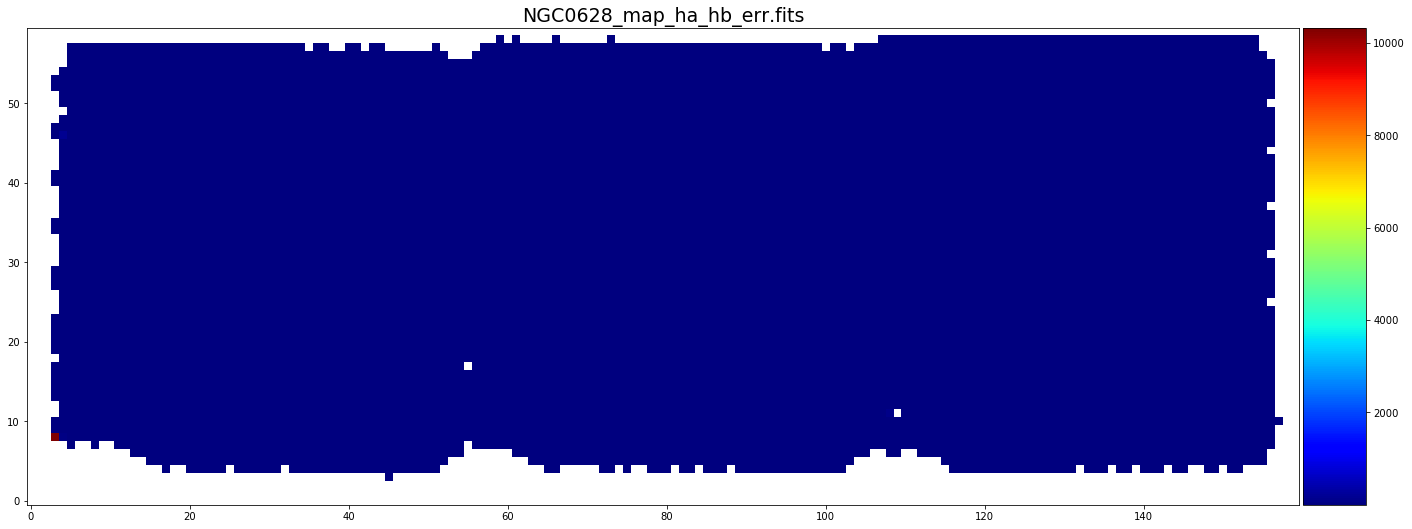

NGC0628_map_hb.fits


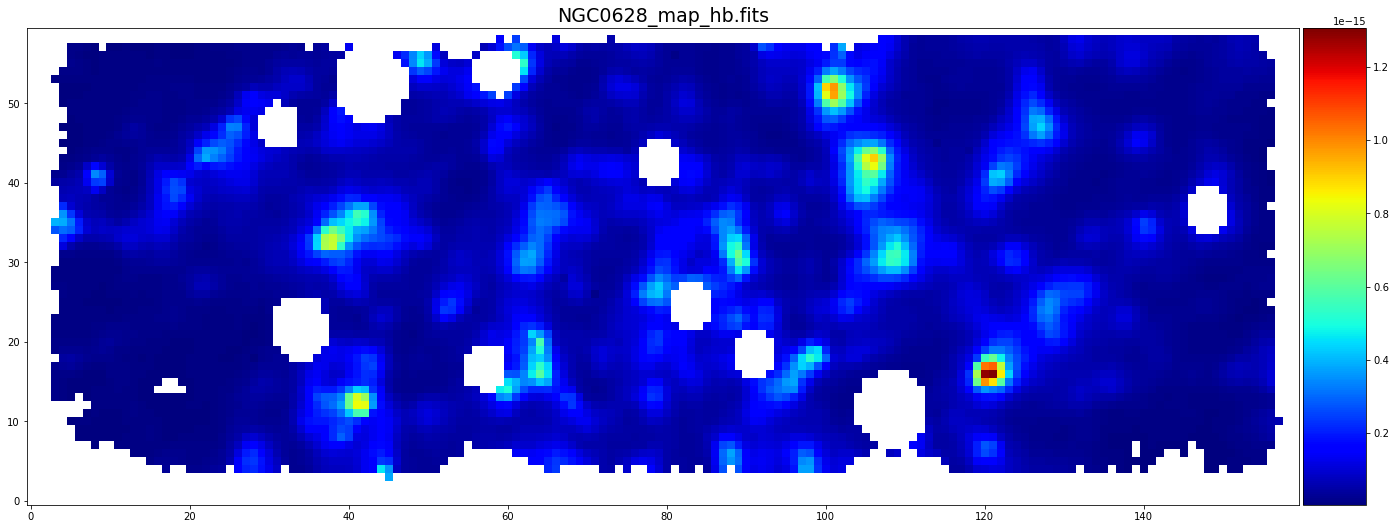

NGC0628_map_hb_corr.fits


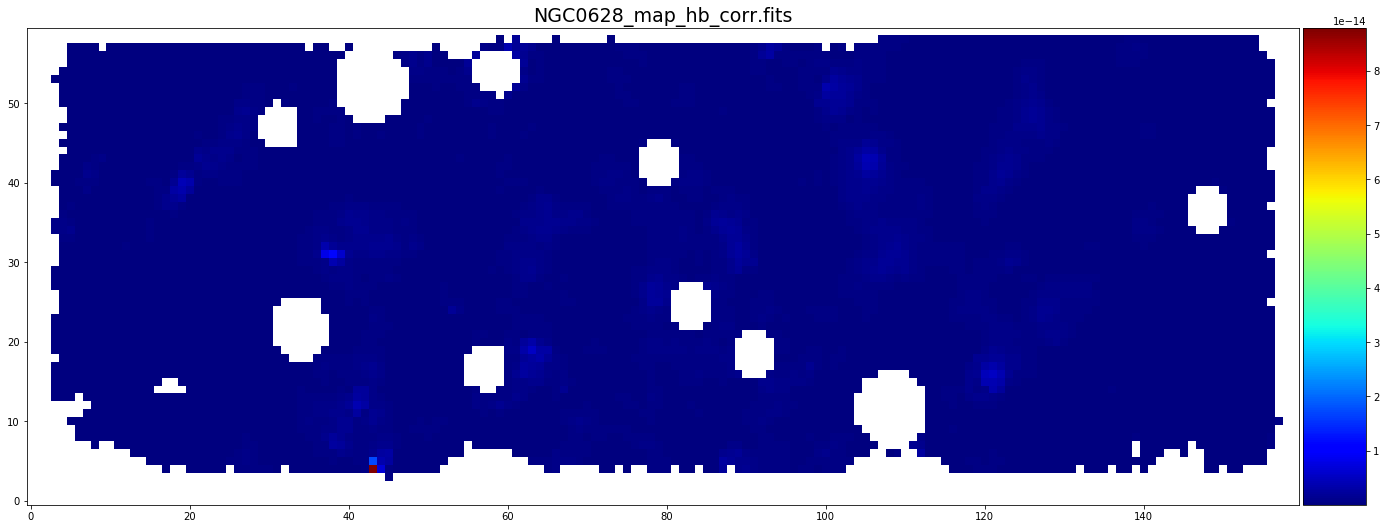

NGC0628_map_hb_corr_err.fits


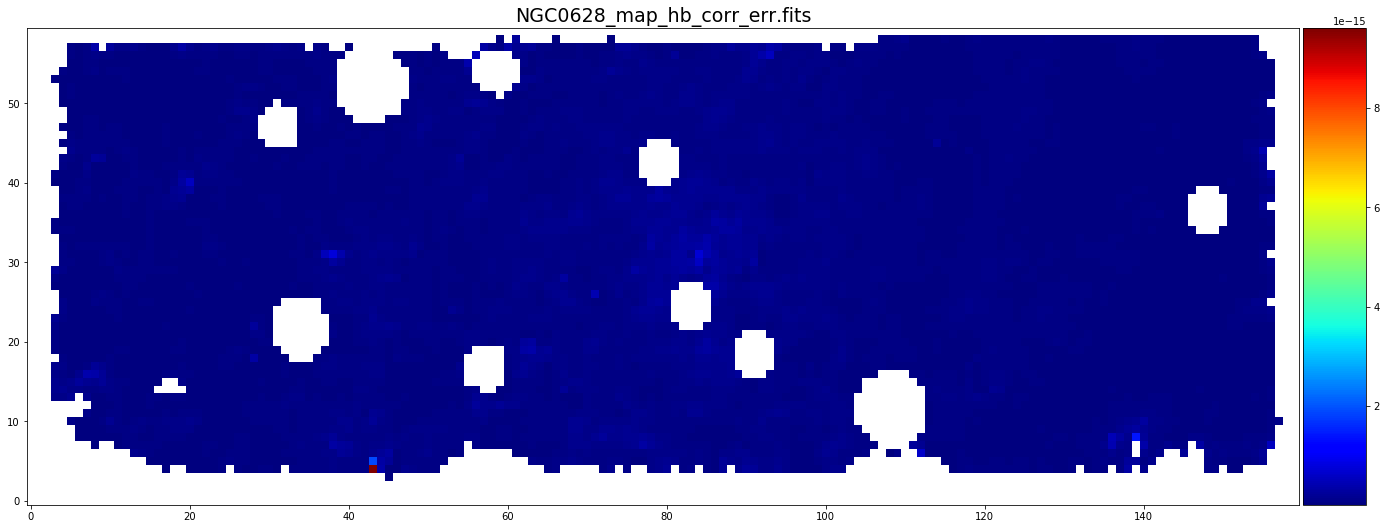

NGC0628_map_hb_err.fits


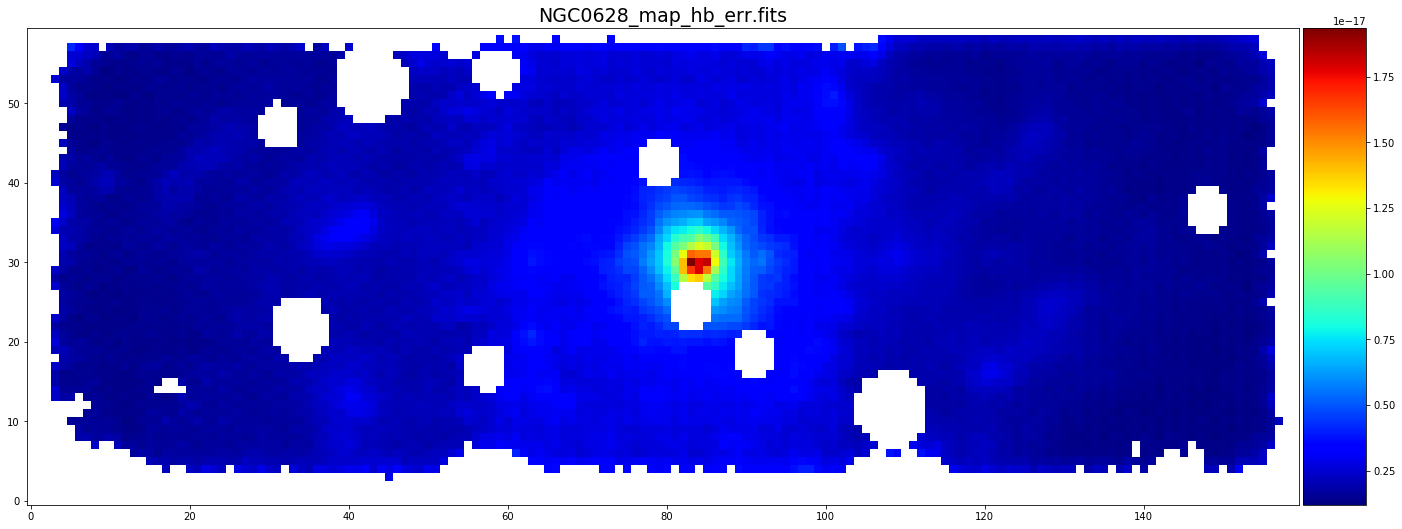

NGC0628_map_izi_logq.fits


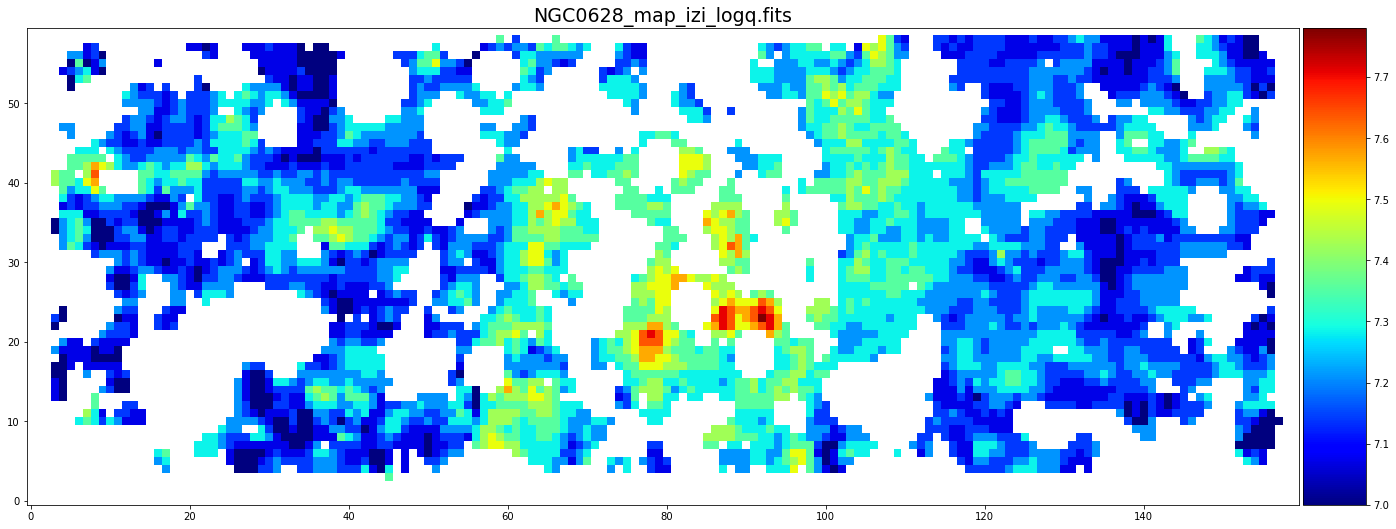

NGC0628_map_izi_logz.fits


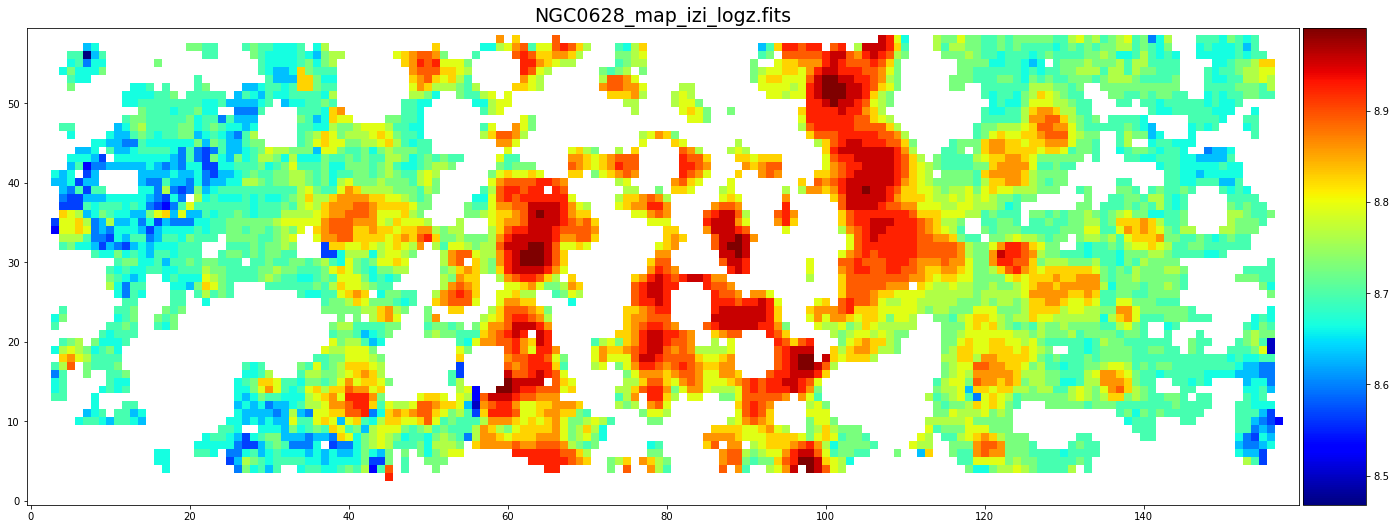

NGC0628_map_nii6548_corr.fits


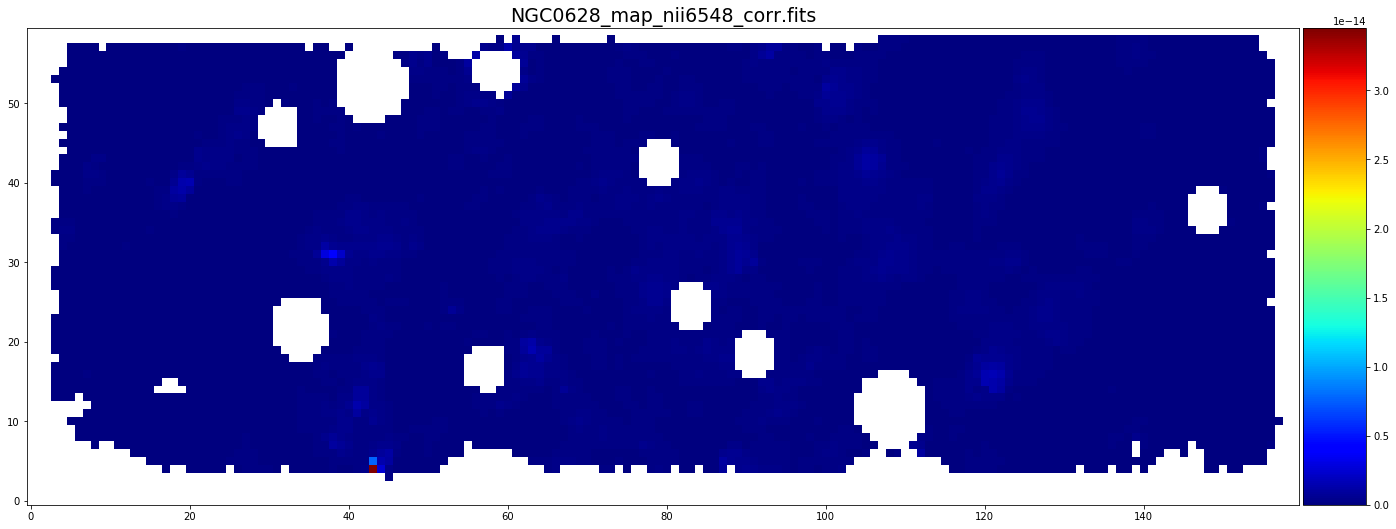

NGC0628_map_nii6548_corr_err.fits


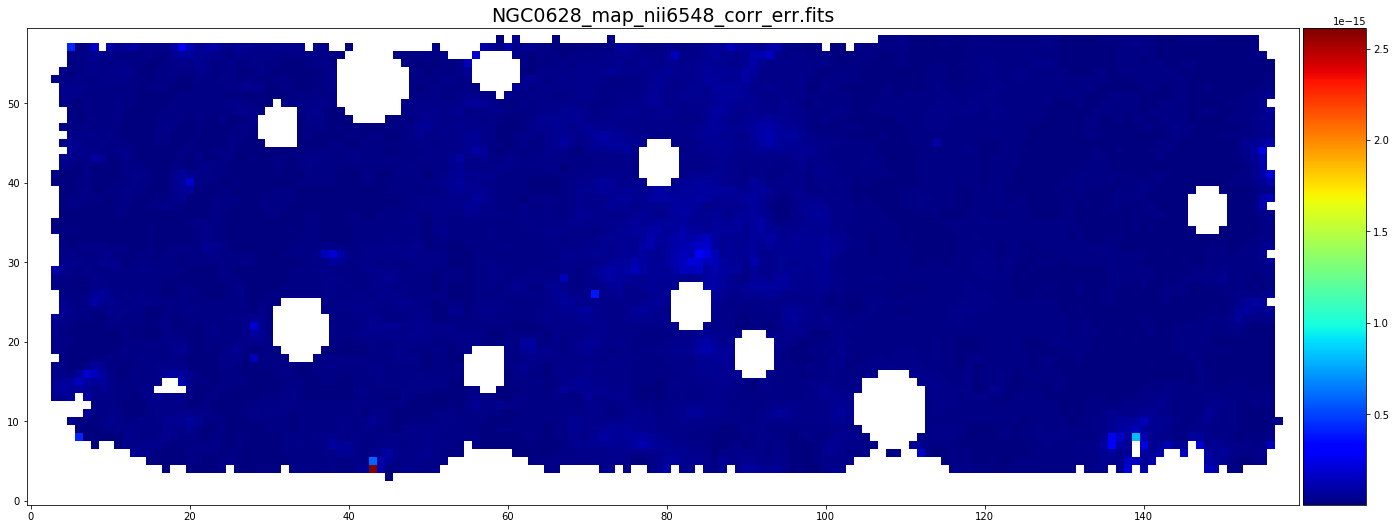

NGC0628_map_nii6583_corr.fits


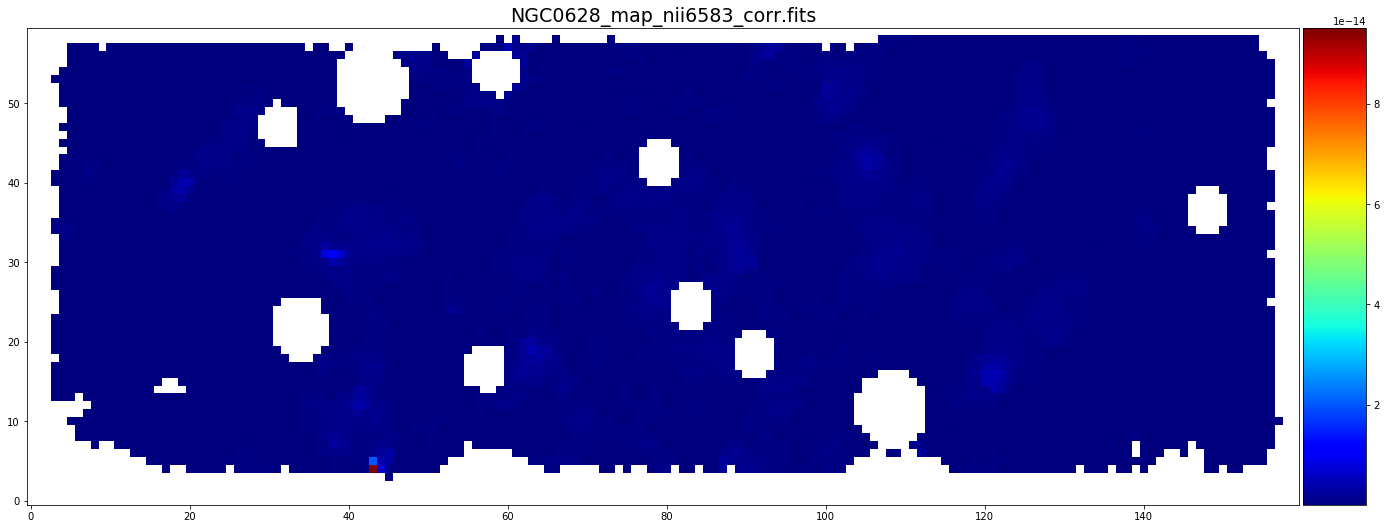

NGC0628_map_nii6583_corr_err.fits


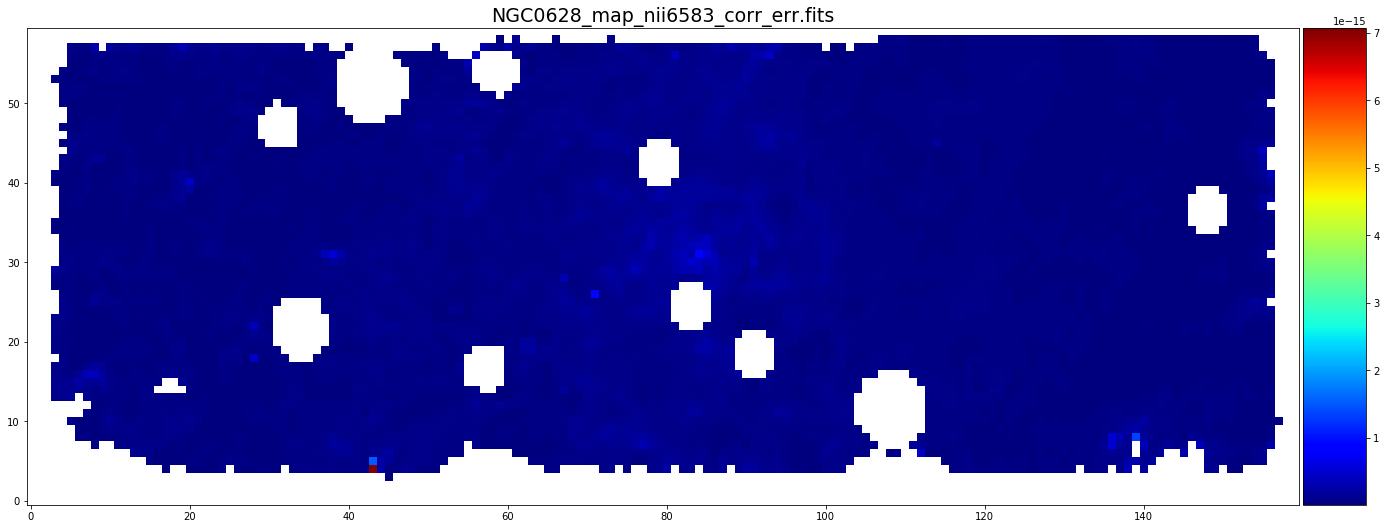

NGC0628_map_oii3727_corr.fits


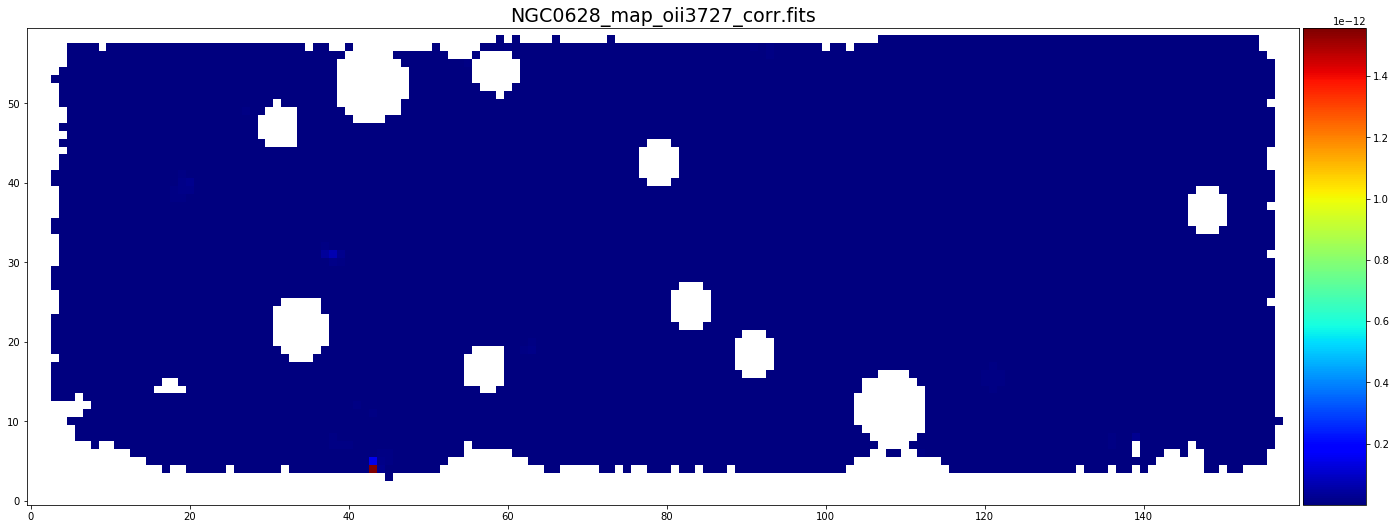

NGC0628_map_oii3727_corr_err.fits


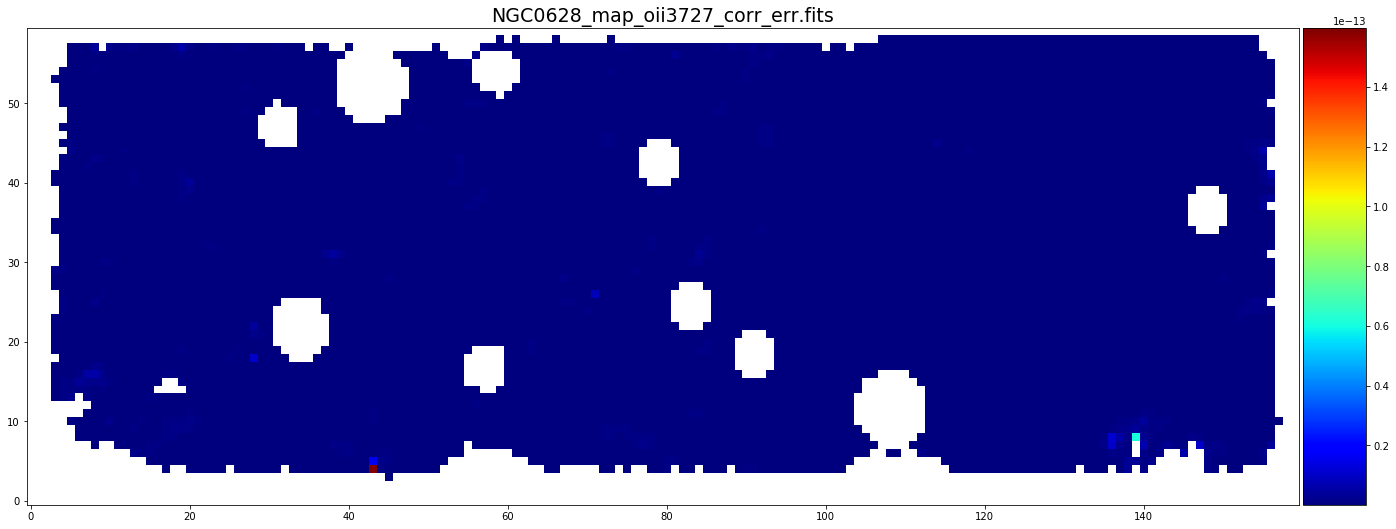

NGC0628_map_oiii4959_corr.fits


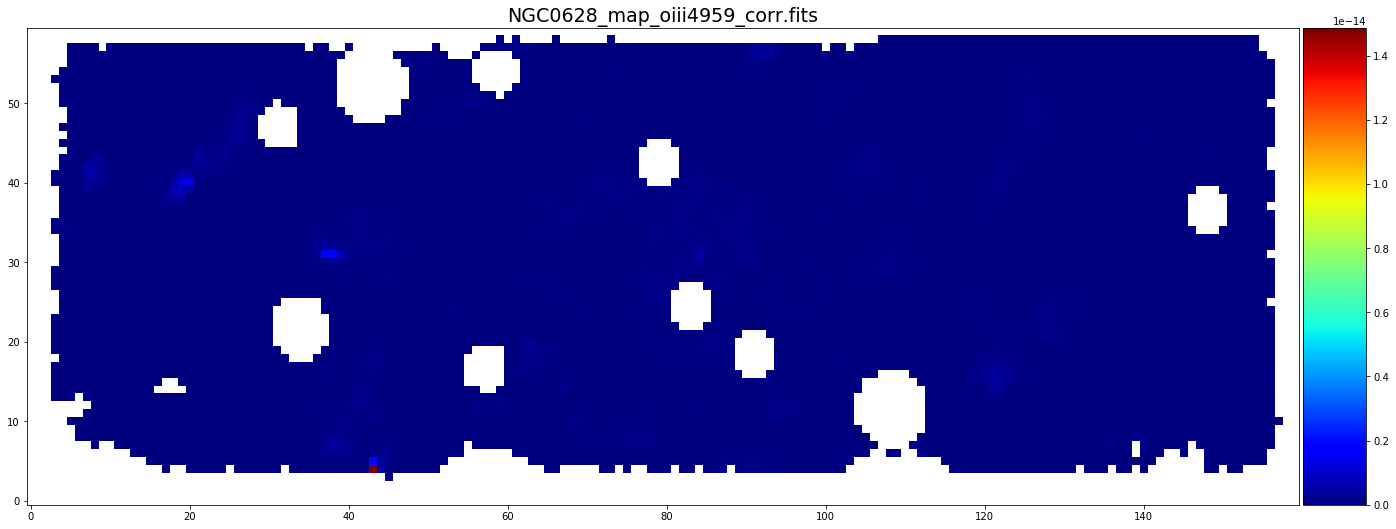

NGC0628_map_oiii4959_corr_err.fits


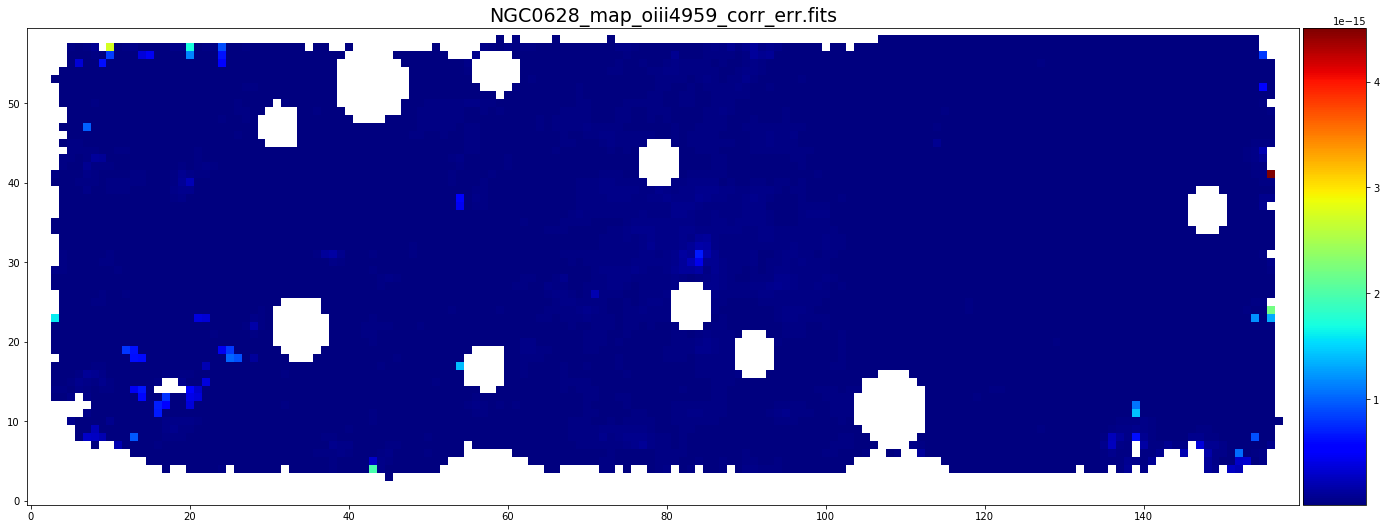

NGC0628_map_oiii5007_corr.fits


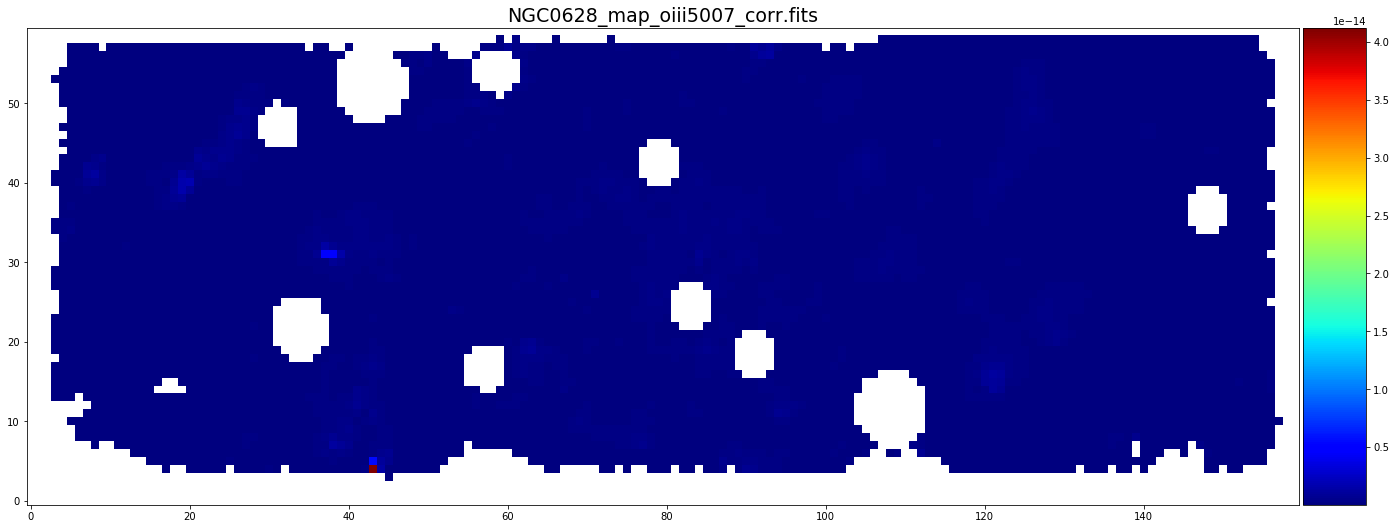

NGC0628_map_oiii5007_corr_err.fits


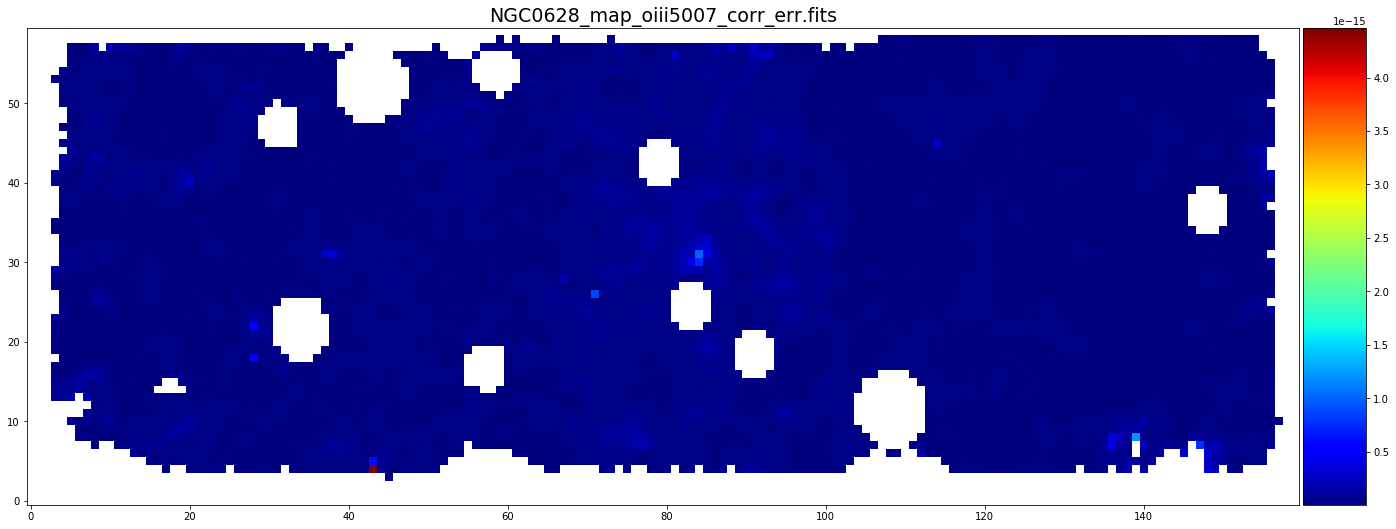

NGC0628_map_siggas.fits


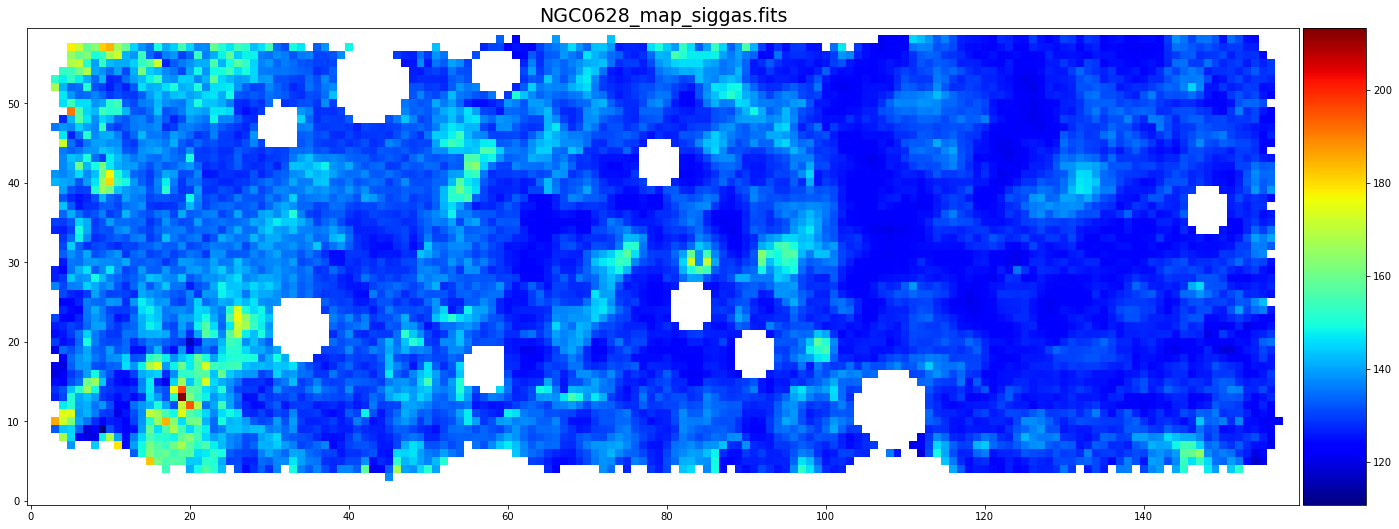

NGC0628_map_siggas_err.fits


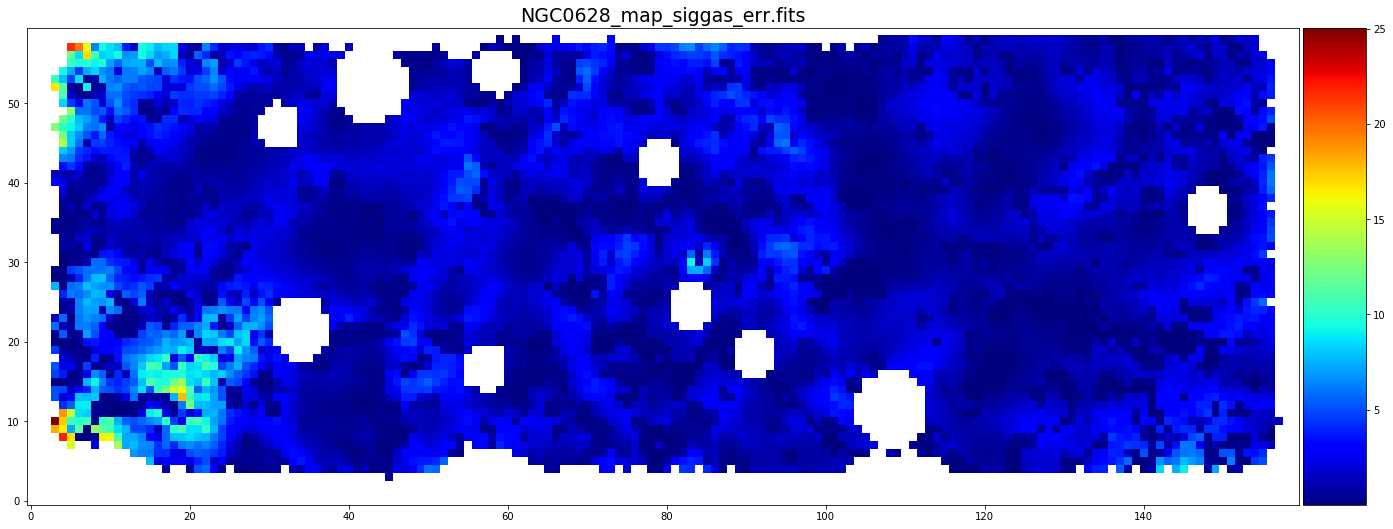

NGC0628_map_sigstar.fits


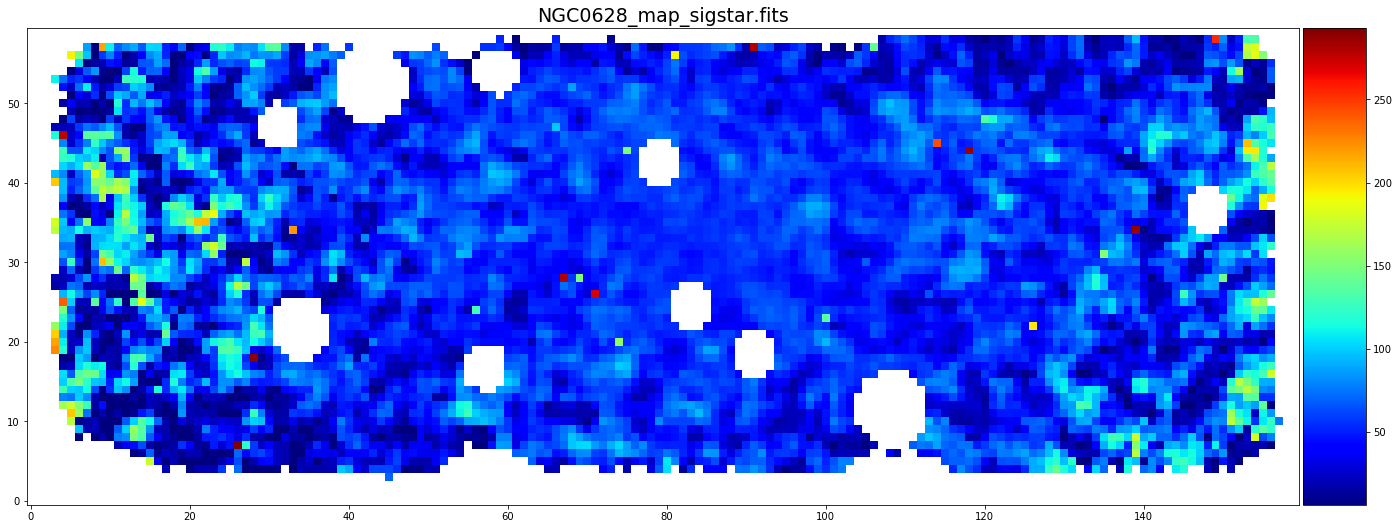

NGC0628_map_sigstar_err.fits


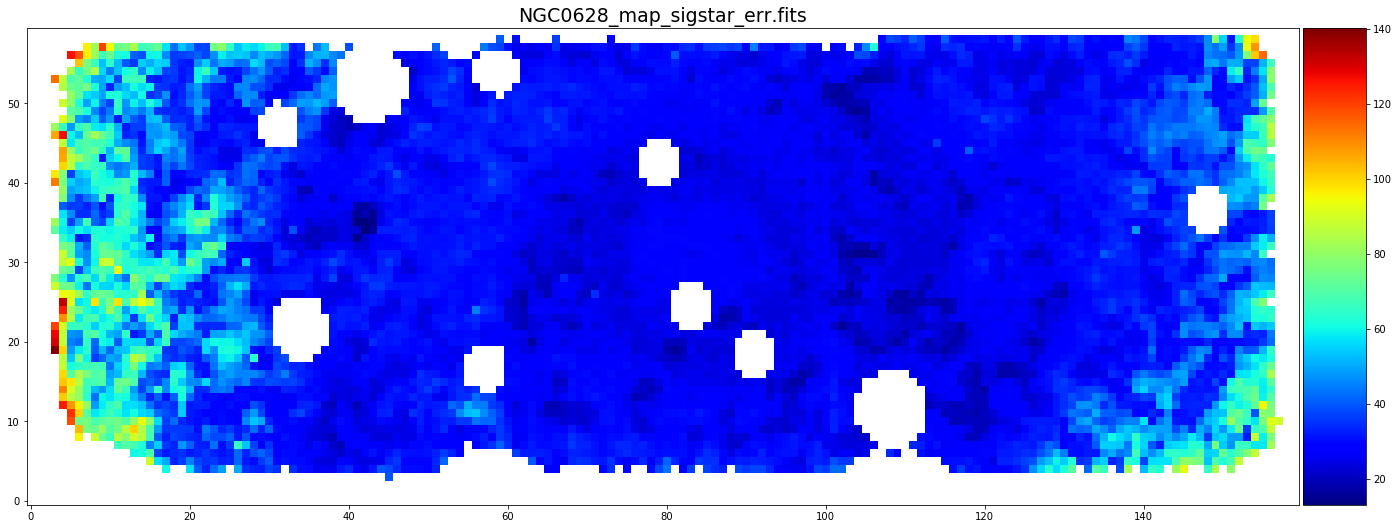

NGC0628_map_sii6717_corr.fits


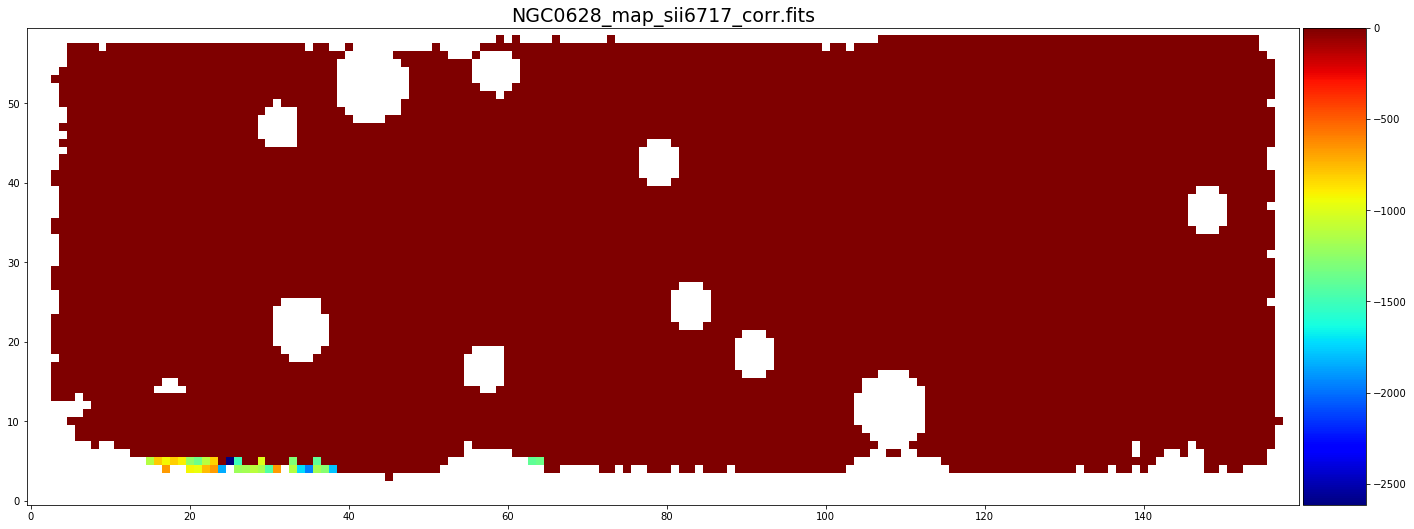

NGC0628_map_sii6717_corr_err.fits


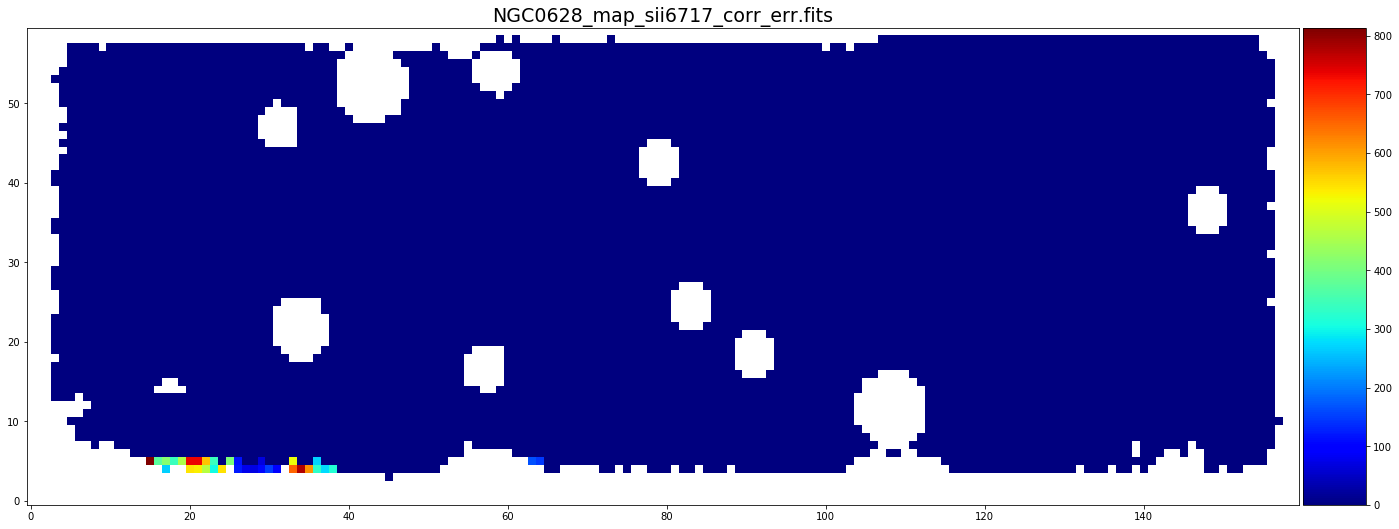

NGC0628_map_sii6731_corr.fits


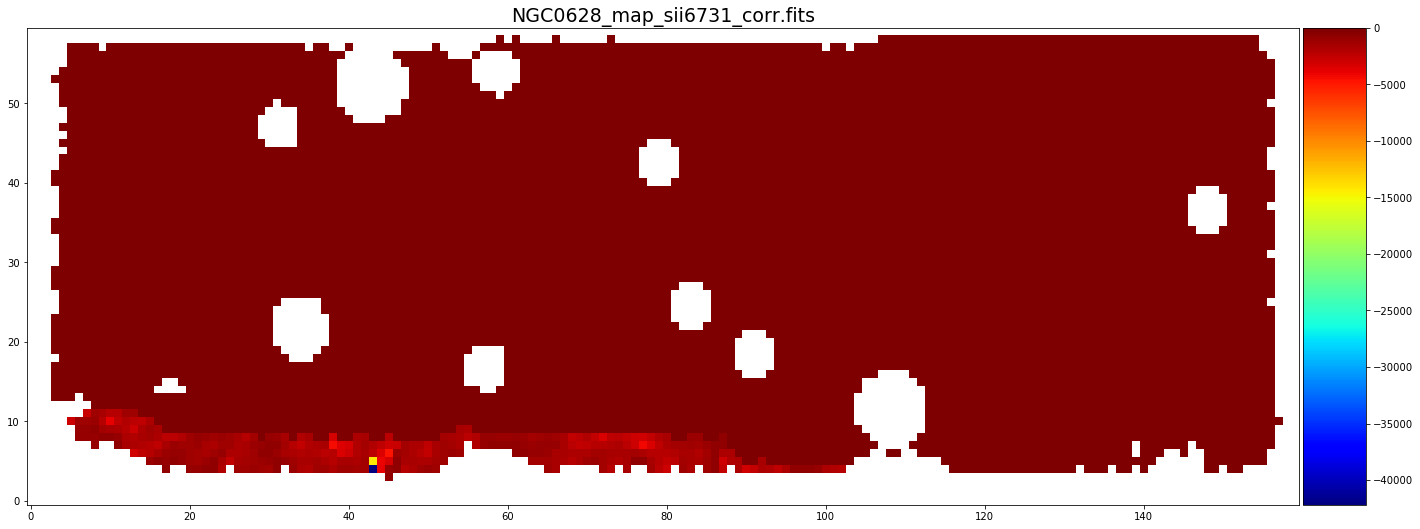

NGC0628_map_sii6731_corr_err.fits


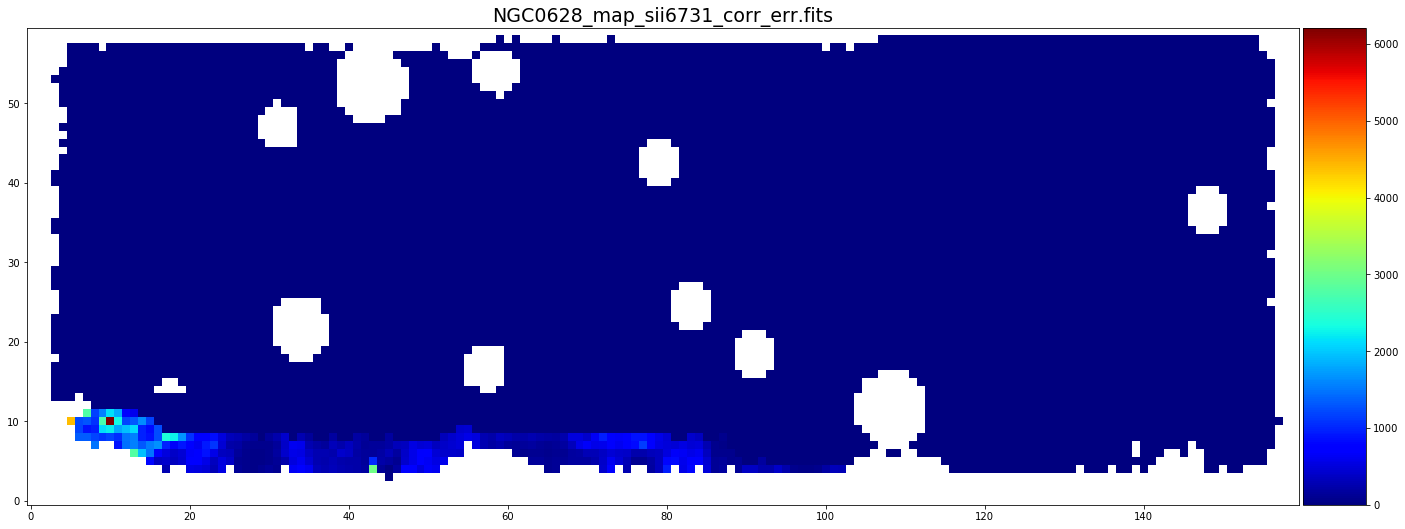

NGC0628_map_vgas.fits


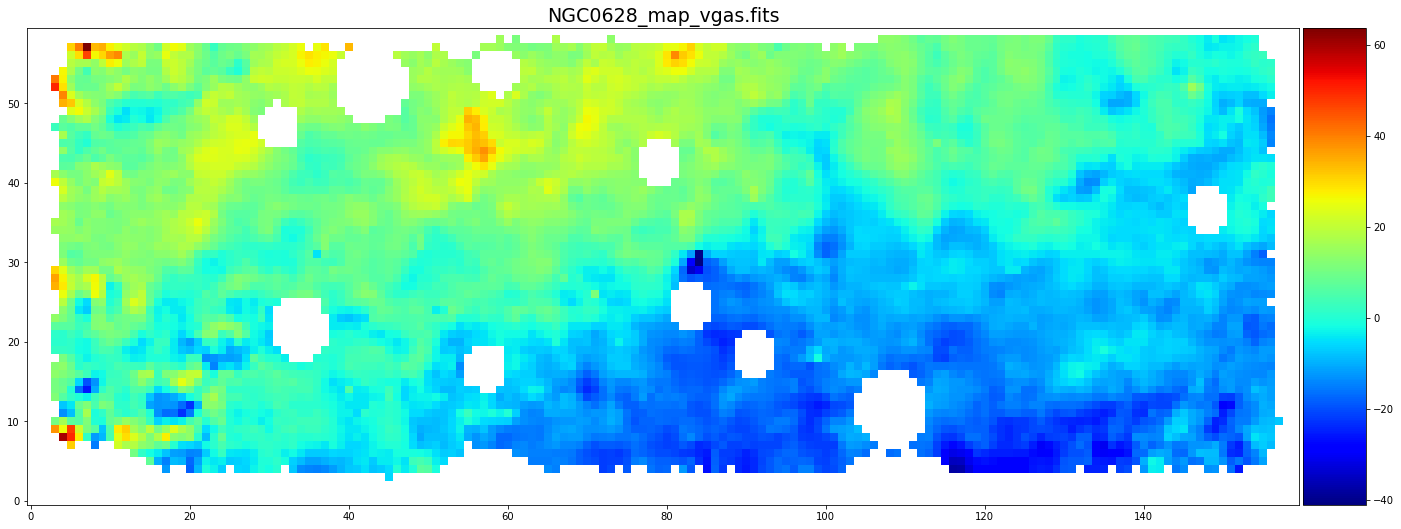

NGC0628_map_vgas_err.fits


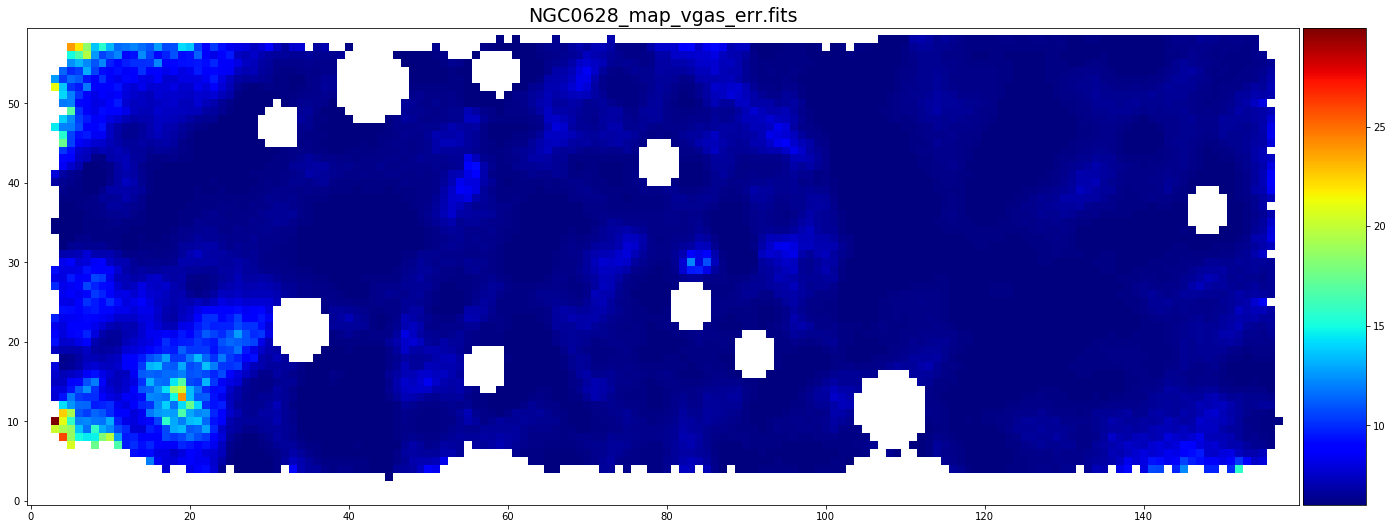

NGC0628_map_vstar.fits


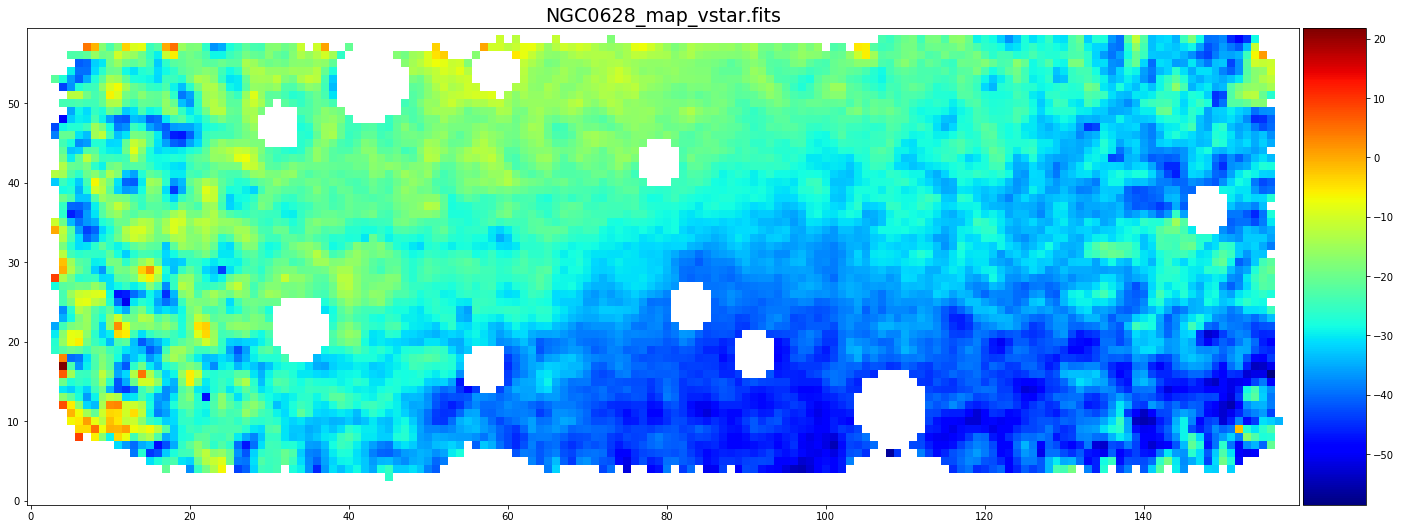

NGC0628_map_vstar_err.fits


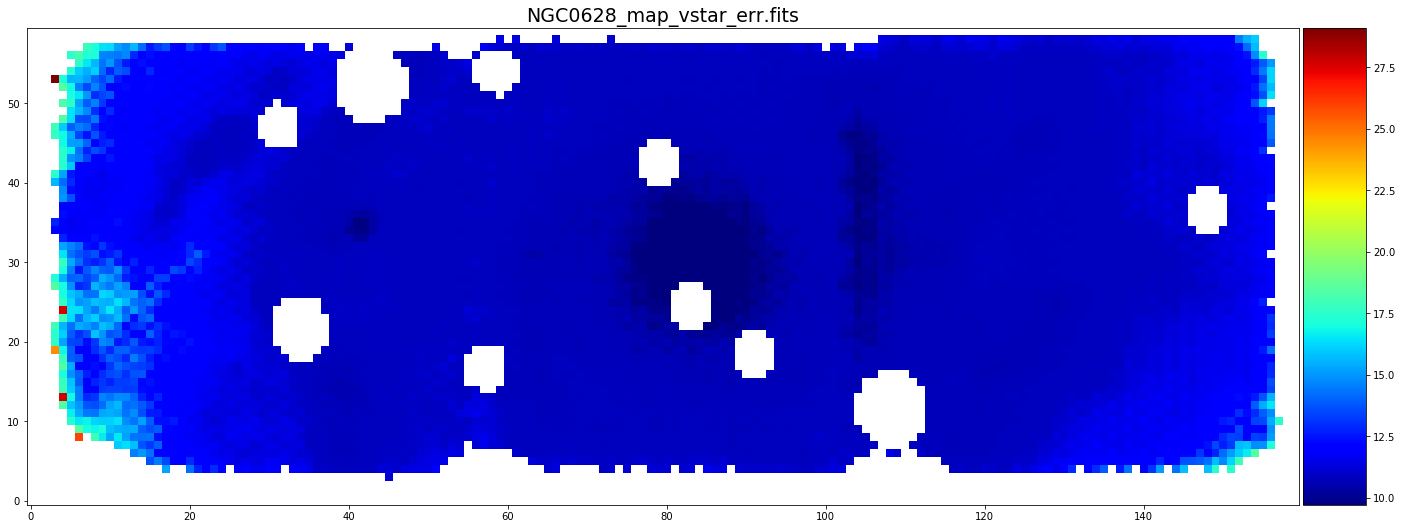

tmpgrid.fits
Image data can not convert to float


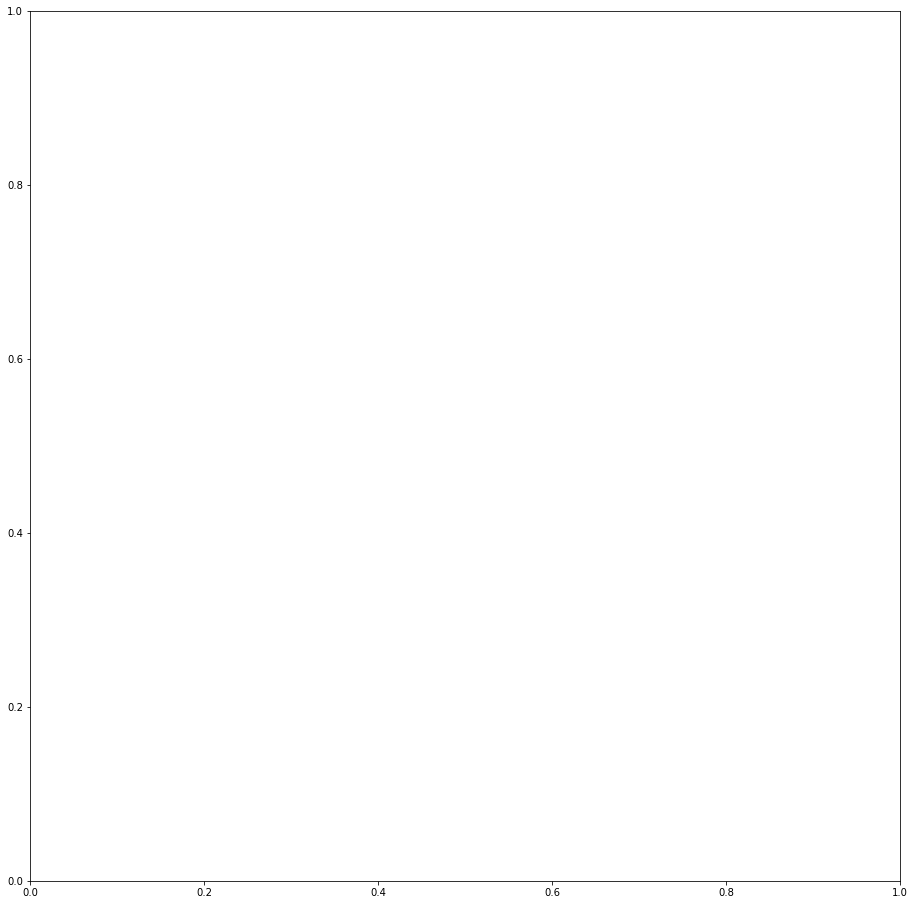

In [7]:
for fname in os.listdir('.'):
    print '=========='
    print fname
    print '=========='
#     hdulist = fits.open(fname)
#     for hdu in hdulist:
#         print hdu.header
    if fname.endswith('.crdownload'):
        continue
    try:
        fig = plt.figure(figsize=[24,16])
        ax = plt.gca()
        data = fits.getdata(fname)
        im = plt.imshow(np.squeeze(data), origin='lower', cmap='jet')
        plt.title(fname, fontsize=19)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        plt.show()
    except Exception, e:
        print e